# Laboratorio: Limpiando el Dataset Building_Permits.cvs

# Materia: Análisis y Curacion de Datos -- Autor: Marcelo Cena


Vamos a proceder a completar los pasos necesarios para "limpiar" un dataset de acuerdo a lo explicado durante las clases. Para esto utilizaremos el Dataset sugerido: PErmosos de Construccion en la Ciudad de San Francisco (CA-USA) en un lapso de unos cuatro años.

## 1.1. Verificar que no hay problemas en la importación

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.options.display.float_format = '{:.2f}'.format

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
permisos_SF = pd.read_csv("../input/Building_Permits.csv")
permisos_SF

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,Unit,Unit Suffix,Description,Current Status,Current Status Date,Filed Date,Issued Date,Completed Date,First Construction Document Date,Structural Notification,Number of Existing Stories,Number of Proposed Stories,Voluntary Soft-Story Retrofit,Fire Only Permit,Permit Expiration Date,Estimated Cost,Revised Cost,Existing Use,Existing Units,Proposed Use,Proposed Units,Plansets,TIDF Compliance,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,NaN,Ellis,St,nan,NaN,"ground fl facade: to erect illuminated, electr...",expired,12/21/2017,05/06/2015,11/09/2015,NaN,11/09/2015,NaN,6.00,nan,NaN,NaN,11/03/2016,4000.00,4000.00,tourist hotel/motel,143.00,NaN,nan,2.00,nan,3.00,constr type 3,nan,NaN,NaN,3.00,Tenderloin,94102.00,"(37.785719256680785, -122.40852313194863)",1380611233945.00
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,NaN,Geary,St,0.00,NaN,remove (e) awning and associated signs.,issued,08/03/2017,04/19/2016,08/03/2017,NaN,08/03/2017,NaN,7.00,nan,NaN,NaN,12/03/2017,1.00,500.00,tourist hotel/motel,nan,NaN,nan,2.00,nan,3.00,constr type 3,nan,NaN,NaN,3.00,Tenderloin,94102.00,"(37.78733980600732, -122.41063199757738)",1420164406718.00
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,NaN,Pacific,Av,nan,NaN,installation of separating wall,withdrawn,09/26/2017,05/27/2016,NaN,NaN,NaN,NaN,6.00,6.00,NaN,NaN,NaN,20000.00,nan,retail sales,39.00,retail sales,39.00,2.00,nan,1.00,constr type 1,1.00,constr type 1,NaN,3.00,Russian Hill,94109.00,"(37.7946573324287, -122.42232562979227)",1424856504716.00
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,NaN,Pacific,Av,0.00,NaN,repair dryrot & stucco at front of bldg.,complete,07/24/2017,11/07/2016,07/18/2017,07/24/2017,07/18/2017,NaN,2.00,2.00,NaN,NaN,07/13/2018,2000.00,2000.00,1 family dwelling,1.00,1 family dwelling,1.00,2.00,nan,5.00,wood frame (5),5.00,wood frame (5),NaN,3.00,Nob Hill,94109.00,"(37.79595867909168, -122.41557405519474)",1443574295566.00
4,201611283529,6,demolitions,11/28/2016,0342,001,950,NaN,Market,St,nan,NaN,demolish retail/office/commercial 3-story buil...,issued,12/01/2017,11/28/2016,12/01/2017,NaN,11/20/2017,NaN,3.00,nan,NaN,NaN,12/01/2018,100000.00,100000.00,retail sales,nan,NaN,nan,2.00,nan,3.00,constr type 3,nan,NaN,NaN,6.00,Tenderloin,94102.00,"(37.78315261897309, -122.40950883997789)",144548169992.00
5,201706149344,8,otc alterations permit,06/14/2017,4105,009,800,NaN,Indiana,St,nan,NaN,evac maps,issued,07/06/2017,06/14/2017,07/06/2017,NaN,07/06/2017,NaN,5.00,5.00,NaN,Y,07/01/2018,4000.00,4000.00,apartments,326.00,apartments,326.00,2.00,nan,1.00,constr type 1,1.00,constr type 1,NaN,10.00,Potrero Hill,94107.00,"(37.75922331346539, -122.39170402628598)",1466911170855.00
6,201706300814,8,otc alterations permit,06/30/2017,1739,020,1291,NaN,11th,Av,0.00,NaN,re-roofing,complete,07/12/2017,06/30/2017,06/30/2017,07/12/2017,06/30/2017,NaN,3.00,3.00,NaN,NaN,06/25/2018,12000.00,12000.00,apartments,5.00,apartments,5.00,0.00,nan,5.00,wood frame (5),5.00,wood frame (5),NaN,5.00,Inner Sunset,94122.00,"(37.764145640138565, -122.46875112470363)",1468970403692.00
7,M803667,8,otc alterations permit,06/30/2017,4789,014,1465,NaN,Revere,Av,nan,NaN,streetspace,issued,06/30/2017,06/30/2017,06/30/2017,NaN,06/30/2017,NaN,nan,nan,NaN,NaN,NaN,nan,0.00,NaN,nan,NaN,nan,nan,nan,nan,NaN,nan,NaN,NaN,10.00,Bayview Hunters Point,94124.00,"(37.73005099023611, -122.38784938916618)",1469035175050.00
8,M804227,8,otc alterations permit,07/05/2017,1212,054,2094,NaN,Fell,St,nan,NaN,street space permit,issued,07/05/2017,07/05/2017,07/05/2017,NaN,07/05/2017,NaN,nan,nan,NaN,NaN,NaN,nan,1.00,NaN,nan,NaN

Guau!!!, no obtuvimos ningún error a la hora de la lectura del conjunto de datos, lo que es un buen comienzo(??).

Seteamos la semillla para reproducibilidad (idealmente un numero primo) y mostramos __aleatoriamente__ 5 muestras del dataset.

In [4]:
import numpy as np
np.random.seed(37)

In [5]:
permisos_SF.sample(5)

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,Unit,Unit Suffix,Description,Current Status,Current Status Date,Filed Date,Issued Date,Completed Date,First Construction Document Date,Structural Notification,Number of Existing Stories,Number of Proposed Stories,Voluntary Soft-Story Retrofit,Fire Only Permit,Permit Expiration Date,Estimated Cost,Revised Cost,Existing Use,Existing Units,Proposed Use,Proposed Units,Plansets,TIDF Compliance,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
12323,201305136730,8,otc alterations permit,05/13/2013,6767,005,22,NaN,Joost,Av,nan,NaN,8 retrofit window fiberglass exterior/wood int...,complete,10/01/2013,05/13/2013,05/13/2013,10/01/2013,05/13/2013,NaN,2.00,2.00,NaN,NaN,05/08/2014,8000.00,8000.00,1 family dwelling,1.00,1 family dwelling,1.00,0.00,nan,5.00,wood frame (5),5.00,wood frame (5),NaN,8.00,West of Twin Peaks,94131.00,"(37.73255042862428, -122.43576337279578)",1304505212561.00
2050,201301188284,8,otc alterations permit,01/18/2013,6655,062,311,NaN,30th,St,nan,NaN,reroofing,complete,01/28/2013,01/18/2013,01/18/2013,01/28/2013,01/18/2013,NaN,2.00,2.00,NaN,NaN,01/13/2014,9300.00,9300.00,1 family dwelling,1.00,1 family dwelling,1.00,0.00,nan,5.00,wood frame (5),5.00,wood frame (5),NaN,8.00,Glen Park,94131.00,"(37.74178315039093, -122.42738148705851)",1293735210121.00
6607,M377247,8,otc alterations permit,03/12/2013,5529,042,139,NaN,Peralta,Av,nan,NaN,street space permit,issued,03/12/2013,03/12/2013,03/12/2013,NaN,03/12/2013,NaN,nan,nan,NaN,NaN,NaN,nan,1.00,NaN,nan,NaN,nan,nan,nan,nan,NaN,nan,NaN,NaN,9.00,Bernal Heights,94110.00,"(37.74707238772461, -122.40762749132058)",1298525183719.00
12354,M393707,8,otc alterations permit,05/13/2013,3547,002A,1880,NaN,Mission,St,nan,NaN,street space permit,issued,05/14/2013,05/13/2013,05/14/2013,NaN,05/13/2013,NaN,nan,nan,NaN,NaN,NaN,nan,1.00,NaN,nan,NaN,nan,nan,nan,nan,NaN,nan,NaN,NaN,9.00,Mission,94103.00,"(37.76714427845487, -122.42034610242814)",1304539459413.00
2090,201301188321,8,otc alterations permit,01/18/2013,7264,006,151,NaN,Everglade,Dr,nan,NaN,revision to pa#2012-11-01-3360. replace wood ...,complete,11/15/2013,01/18/2013,02/21/2013,11/15/2013,02/21/2013,NaN,2.00,2.00,NaN,NaN,02/16/2014,1.00,1.00,1 family dwelling,1.00,1 family dwelling,1.00,2.00,nan,5.00,wood frame (5),5.00,wood frame (5),NaN,7.00,Sunset/Parkside,94132.00,"(37.731503594758614, -122.48911624527861)",1293777225652.00


Veamos si descripción del dataset se corresponde con lo levantado https://www.kaggle.com/aparnashastry/building-permit-applications-data/data

In [6]:
pd.DataFrame([["Permit Number", "Number assigned while filing", "String"],
["Permit Type", "Type of the permit represented numerically", "Numeric"],
["Permit Type Definition", "Description of the Permit type, for example new construction, alterations", "String"],
["Permit Creation Date", "Date on which permit created, later than or same as filing date", "DateTime"],
["Block", "Related to address", "String"],
["Lot", "Related to address", "String"], 
["Street Number", "Related to address", "Numeric"],
["Street Number Suffix", "Related to address", "String"],
["Street Name", "Related to address", "String"],
["Street Suffix", "Related to address", "String"],
["Unit", "Unit of a building", "String"],
["Unit Suffix", "Suffix if any, for the unit", "String"],         
["Description", "Details about purpose of the permit. Example: reroofing, bathroom renovation", "String"],
["Current Status", "Current status of the permit application", "String"],
["Current Status Date", "Date at which current status was entered", "DateTime"],       
["Filed Date", "Filed date for the permit", "DateTime"],
["Issued Date", "Issued date for the permit", "DateTime"],
["Completed Date", "The date on which project was completed, applicable if Current Status = 'completed'", "DataTime"],    
["First Construction Document Date", "Date on which construction was documented", "DateTime"],
["Structural Notification", "Notification to meet some legal need, given or not", "String"],
["Number of Existing Stories", "Number of existing stories in the building. Not applicable for certain permit types", "String"],
["Number of Proposed Stories", "Number of proposed stories for the construction/alteration", "String"],
["Voluntary Soft-Story Retrofit", "Soft story to meet earth quake regulations", "String"],
["Fire Only Permit", "Fire hazard prevention related permit", "String"],    
["Permit Expiration Date", "Expiration date related to issued permit", "DateTime"],                   
["Estimated Cost", "Initial estimation of the cost of the project", "String"],
["Revised Cost", "Revised estimation of the cost of the project", "String"],
["Existing Use", "Existing use of the building", "String"],
["Existing Units", "Existing number of units", "String"],
["Proposed Use", "Proposed use of the building", "String"],    
["Proposed Units", "Proposed number of units", "String"],
["Plansets", "Plan representation indicating the general design intent of the foundation", "String"],
["TIDF Compliance", "No description provided", "String"],  
["Existing Construction Type", "Construction type, existing,as categories represented numerically", "String"],
["Existing Construction Type Description", "Description of the above, for example, wood or other construction types", "String"],
["Proposed Construction Type", "Construction type, proposed, as categories represented numerically", "String"],           
["Proposed Construction Type Description", "Description of the above", "String"],
["Site Permit", "Permit for site", "String"],
["Supervisor District", "Supervisor District to which the building location belongs to", "Numeric"],
["Neighborhoods - Analysis Boundaries", "Neighborhood to which the building location belongs to", "String"],
["Zipcode", "Zipcode of building address", "Numeric"],
["Location", "Location in latitude, longitude pair.", "String"],
["Record ID", "Some ID, not useful for this", "Numeric"]], columns=["Field name","Field description", "Type"])

,Field name,Field description,Type
0,Permit Number,Number assigned while filing,String
1,Permit Type,Type of the permit represented numerically,Numeric
2,Permit Type Definition,"Description of the Permit type, for example ne...",String
3,Permit Creation Date,"Date on which permit created, later than or sa...",DateTime
4,Block,Related to address,String
5,Lot,Related to address,String
6,Street Number,Related to address,Numeric
7,Street Number Suffix,Related to address,String
8,Street Name,Related to address,String
9,Street Suffix,Related to address,String


In [7]:
permisos_SF.dtypes

Permit Number                              object
Permit Type                                 int64
Permit Type Definition                     object
Permit Creation Date                       object
Block                                      object
Lot                                        object
Street Number                               int64
Street Number Suffix                       object
Street Name                                object
Street Suffix                              object
Unit                                      float64
Unit Suffix                                object
Description                                object
Current Status                             object
Current Status Date                        object
Filed Date                                 object
Issued Date                                object
Completed Date                             object
First Construction Document Date           object
Structural Notification                    object


Los campos __objects__ generalmente son __strings__, por ende no se reconocieron como fechas a __Permit Creation Date__, __Current Status Date__, __Permit Expiration Date__, __Filed Date__, __Issued Date__, __Completed Date__ y __First Construction Document Date__. Además, algunas columnas que aparecen como __String__ en la descripción de la Kaggle, en jupyter son tomadas como __Float64__.

Veamos un resumen de los datos, incluyendo todos los tipos de datos __numéricos__ y __categóricos__.

In [8]:
permisos_SF.describe(include='all')

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,Unit,Unit Suffix,Description,Current Status,Current Status Date,Filed Date,Issued Date,Completed Date,First Construction Document Date,Structural Notification,Number of Existing Stories,Number of Proposed Stories,Voluntary Soft-Story Retrofit,Fire Only Permit,Permit Expiration Date,Estimated Cost,Revised Cost,Existing Use,Existing Units,Proposed Use,Proposed Units,Plansets,TIDF Compliance,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
count,13721,13721.00,13721,13721,13721,13721,13721.00,141,13721,13545,1895.00,165,13701,13721,13720,13720,13139,8153,13138,419,10859.00,10685.00,9,1293,10605,11132.00,13497.00,10935,10213.00,10729,10127.00,11159.00,0.00,10811.00,10811,10657.00,10657,275,13616.00,13616,13616.00,13617,13720.00
unique,12651,nan,8,281,3354,493,nan,8,1089,15,nan,51,9647,12,992,280,558,805,572,1,nan,nan,1,1,723,nan,nan,62,nan,69,nan,nan,nan,nan,5,nan,5,1,nan,40,nan,7937,nan
top,201302200559,nan,otc alterations permit,05/20/2013,3708,001,nan,A,Market,St,nan,C,street space,complete,03/21/2013,05/20/2013,05/21/2013,03/21/2013,05/21/2013,Y,nan,nan,Y,Y,05/16/2014,nan,nan,1 family dwelling,nan,1 family dwelling,nan,nan,nan,nan,wood frame (5),nan,wood frame (5),Y,nan,Financial District/South Beach,nan,"(37.77674230325018, -122.41635986037679)",nan
freq,5,nan,12351,181,84,706,nan,97,466,9784,nan,24,1381,8131,133,182,156,91,156,419,nan,nan,9,1293,125,nan,nan,3417,nan,3379,nan,nan,nan,nan,7707,nan,7704,275,nan,1471,nan,42,nan
mean,NaN,7.54,NaN,NaN,NaN,NaN,1131.90,NaN,NaN,NaN,91.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.46,5.54,NaN,NaN,NaN,122423.84,117592.01,NaN,14.60,NaN,15.37,1.14,nan,4.03,NaN,4.07,NaN,NaN,5.53,NaN,94115.43,NaN,1080048670455.34
std,NaN,1.42,NaN,NaN,NaN,NaN,1154.75,NaN,NaN,NaN,337.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.35,8.43,NaN,NaN,NaN,3156875.44,3591673.64,NaN,70.17,NaN,70.55,0.99,nan,1.60,NaN,1.58,NaN,NaN,2.87,NaN,9.37,NaN,463579150586.99
min,NaN,1.00,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,1.00,0.00,NaN,0.00,NaN,0.00,0.00,nan,1.00,NaN,1.00,NaN,NaN,1.00,NaN,94102.00,NaN,12935321500.00
25%,NaN,8.00,NaN,NaN,NaN,NaN,242.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.00,2.00,NaN,NaN,NaN,2500.00,1.00,NaN,1.00,NaN,1.00,0.00,nan,3.00,NaN,3.00,NaN,NaN,3.00,NaN,94109.00,NaN,1293155074613.75
50%,NaN,8.00,NaN,NaN,NaN,NaN,711.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.00,3.00,NaN,NaN,NaN,9000.00,5500.00,NaN,1.00,NaN,1.00,2.00,nan,5.00,NaN,5.00,NaN,NaN,6.00,NaN,94114.00,NaN,1297529719755.50
75%,NaN,8.00,NaN,NaN,NaN,NaN,1718.00,NaN,NaN,NaN,1.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.00,4.00,NaN,NaN,NaN,25000.00,20800.00,NaN,3.00,NaN,3.00,2.00,nan,5.00,NaN,5.00,NaN,NaN,8.00,NaN,94122.00,NaN,1302021418019.25


Indicamos explícitamente aquellas columnas que son fechas y no fueron detectadas como tales. Luego chequeamos que el cambio aplicado se haya reflejado en el dataset.

In [9]:
permisos_SF = pd.read_csv("../input/Building_Permits.csv", 
                               parse_dates=["Permit Creation Date","Current Status Date", "Filed Date",
                                           "Issued Date","Completed Date",
                                           "First Construction Document Date",
                                           "Permit Expiration Date"])
permisos_SF.dtypes

Permit Number                                     object
Permit Type                                        int64
Permit Type Definition                            object
Permit Creation Date                      datetime64[ns]
Block                                             object
Lot                                               object
Street Number                                      int64
Street Number Suffix                              object
Street Name                                       object
Street Suffix                                     object
Unit                                             float64
Unit Suffix                                       object
Description                                       object
Current Status                                    object
Current Status Date                       datetime64[ns]
Filed Date                                datetime64[ns]
Issued Date                               datetime64[ns]
Completed Date                 

Como vemos, ahora las fechas son reconocidas como tales :)

In [10]:
permisos_SF.sample(5)

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,Unit,Unit Suffix,Description,Current Status,Current Status Date,Filed Date,Issued Date,Completed Date,First Construction Document Date,Structural Notification,Number of Existing Stories,Number of Proposed Stories,Voluntary Soft-Story Retrofit,Fire Only Permit,Permit Expiration Date,Estimated Cost,Revised Cost,Existing Use,Existing Units,Proposed Use,Proposed Units,Plansets,TIDF Compliance,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
4159,201302120050,8,otc alterations permit,2013-02-12,0103,035,533,NaN,Filbert,St,nan,NaN,remodel (e) kitchen and (1) bath. no structu...,complete,2013-07-15,2013-02-12,2013-02-12,2013-07-15,2013-02-12,NaN,3.00,3.00,NaN,NaN,2014-02-07,20000.00,35111.00,apartments,6.00,apartments,6.00,0.00,nan,5.00,wood frame (5),5.00,wood frame (5),NaN,3.00,North Beach,94133.00,"(37.801310363829174, -122.40820685838955)",1295944283303.00
9636,M385447,8,otc alterations permit,2013-04-15,2691,028,4595,NaN,18th,St,nan,NaN,street space,issued,2013-04-15,2013-04-15,2013-04-15,NaT,2013-04-15,NaN,nan,nan,NaN,NaN,NaT,nan,1.00,NaN,nan,NaN,nan,nan,nan,nan,NaN,nan,NaN,NaN,8.00,Castro/Upper Market,94114.00,"(37.7602704601782, -122.44144319791276)",1301691141848.00
7705,201303252909,8,otc alterations permit,2013-03-25,1597,044A,4631,NaN,Balboa,St,nan,NaN,proposed interior remodel of 2 unit building a...,complete,2014-02-13,2013-03-25,2013-04-01,2014-02-13,2013-04-01,NaN,4.00,4.00,NaN,NaN,2014-03-27,80000.00,80000.00,2 family dwelling,2.00,2 family dwelling,2.00,2.00,nan,5.00,wood frame (5),5.00,wood frame (5),NaN,1.00,Outer Richmond,94121.00,"(37.77496431081872, -122.50859124883053)",1299670106040.00
221,M820931,8,otc alterations permit,2017-08-18,0240,016,550,NaN,Kearny,St,nan,NaN,street space,issued,2017-08-18,2017-08-18,2017-08-18,NaT,2017-08-18,NaN,nan,nan,NaN,NaN,NaT,nan,1.00,NaN,nan,NaN,nan,nan,nan,nan,NaN,nan,NaN,NaN,3.00,Financial District/South Beach,94104.00,"(37.79334149331904, -122.40421642472705)",1475260350373.00
3512,M369928,8,otc alterations permit,2013-02-05,1217,029,360,NaN,Divisadero,St,nan,NaN,street space,issued,2013-02-05,2013-02-05,2013-02-05,NaT,2013-02-05,NaN,nan,nan,NaN,NaN,NaT,nan,1.00,NaN,nan,NaN,nan,nan,nan,nan,NaN,nan,NaN,NaN,5.00,Haight Ashbury,94117.00,"(37.77304890306759, -122.4370732114852)",129527492706.00


In [11]:
permisos_SF.describe(include='all')

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,Unit,Unit Suffix,Description,Current Status,Current Status Date,Filed Date,Issued Date,Completed Date,First Construction Document Date,Structural Notification,Number of Existing Stories,Number of Proposed Stories,Voluntary Soft-Story Retrofit,Fire Only Permit,Permit Expiration Date,Estimated Cost,Revised Cost,Existing Use,Existing Units,Proposed Use,Proposed Units,Plansets,TIDF Compliance,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
count,13721,13721.00,13721,13721,13721,13721,13721.00,141,13721,13545,1895.00,165,13701,13721,13720,13720,13139,8153,13138,419,10859.00,10685.00,9,1293,10605,11132.00,13497.00,10935,10213.00,10729,10127.00,11159.00,0.00,10811.00,10811,10657.00,10657,275,13616.00,13616,13616.00,13617,13720.00
unique,12651,nan,8,281,3354,493,nan,8,1089,15,nan,51,9647,12,992,280,558,805,572,1,nan,nan,1,1,723,nan,nan,62,nan,69,nan,nan,nan,nan,5,nan,5,1,nan,40,nan,7937,nan
top,201302200559,nan,otc alterations permit,2013-05-20 00:00:00,3708,001,nan,A,Market,St,nan,C,street space,complete,2013-03-21 00:00:00,2013-05-20 00:00:00,2013-05-21 00:00:00,2013-03-21 00:00:00,2013-05-21 00:00:00,Y,nan,nan,Y,Y,2014-05-16 00:00:00,nan,nan,1 family dwelling,nan,1 family dwelling,nan,nan,nan,nan,wood frame (5),nan,wood frame (5),Y,nan,Financial District/South Beach,nan,"(37.77674230325018, -122.41635986037679)",nan
freq,5,nan,12351,181,84,706,nan,97,466,9784,nan,24,1381,8131,133,182,156,91,156,419,nan,nan,9,1293,125,nan,nan,3417,nan,3379,nan,nan,nan,nan,7707,nan,7704,275,nan,1471,nan,42,nan
first,NaN,nan,NaN,2012-03-28 00:00:00,NaN,NaN,nan,NaN,NaN,NaN,nan,NaN,NaN,NaN,2013-01-02 00:00:00,2013-01-02 00:00:00,2013-01-02 00:00:00,2013-01-04 00:00:00,2013-01-02 00:00:00,NaN,nan,nan,NaN,NaN,2013-07-15 00:00:00,nan,nan,NaN,nan,NaN,nan,nan,nan,nan,NaN,nan,NaN,NaN,nan,NaN,nan,NaN,nan
last,NaN,nan,NaN,2017-12-29 00:00:00,NaN,NaN,nan,NaN,NaN,NaN,nan,NaN,NaN,NaN,2018-02-23 00:00:00,2017-12-29 00:00:00,2018-02-23 00:00:00,2018-02-06 00:00:00,2018-02-23 00:00:00,NaN,nan,nan,NaN,NaN,2021-11-12 00:00:00,nan,nan,NaN,nan,NaN,nan,nan,nan,nan,NaN,nan,NaN,NaN,nan,NaN,nan,NaN,nan
mean,NaN,7.54,NaN,NaN,NaN,NaN,1131.90,NaN,NaN,NaN,91.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.46,5.54,NaN,NaN,NaN,122423.84,117592.01,NaN,14.60,NaN,15.37,1.14,nan,4.03,NaN,4.07,NaN,NaN,5.53,NaN,94115.43,NaN,1080048670455.34
std,NaN,1.42,NaN,NaN,NaN,NaN,1154.75,NaN,NaN,NaN,337.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.35,8.43,NaN,NaN,NaN,3156875.44,3591673.64,NaN,70.17,NaN,70.55,0.99,nan,1.60,NaN,1.58,NaN,NaN,2.87,NaN,9.37,NaN,463579150586.99
min,NaN,1.00,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,1.00,0.00,NaN,0.00,NaN,0.00,0.00,nan,1.00,NaN,1.00,NaN,NaN,1.00,NaN,94102.00,NaN,12935321500.00
25%,NaN,8.00,NaN,NaN,NaN,NaN,242.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.00,2.00,NaN,NaN,NaN,2500.00,1.00,NaN,1.00,NaN,1.00,0.00,nan,3.00,NaN,3.00,NaN,NaN,3.00,NaN,94109.00,NaN,1293155074613.75


Podemos ver que tenemos primero y último en el resumen de las columnas de fechas.

Ahora deberíamos poder calcular el rango de las distintas fechas.

In [12]:
permisos_SF['Permit Creation Date'].max() - permisos_SF['Permit Creation Date'].min()

Timedelta('2102 days 00:00:00')

In [13]:
permisos_SF['Permit Expiration Date'].max() - permisos_SF['Permit Expiration Date'].min()

Timedelta('3042 days 00:00:00')

In [14]:
permisos_SF['Current Status Date'].max() - permisos_SF['Current Status Date'].min()

Timedelta('1878 days 00:00:00')

In [15]:
permisos_SF['Filed Date'].max() - permisos_SF['Filed Date'].min()

Timedelta('1822 days 00:00:00')

In [16]:
permisos_SF['First Construction Document Date'].max() - permisos_SF['First Construction Document Date'].min()

Timedelta('1878 days 00:00:00')

# 1.2. Asegurar de tener IDs/claves únicas

Vamos a chequear que no existan datos duplicados.

In [17]:
permisos_SF.shape

(13721, 43)

Definimos como índice del dataset a la columna __Permit Number__.

In [18]:
permisos_SF = pd.read_csv("../input/Building_Permits.csv", 
                               parse_dates=["Permit Creation Date","Current Status Date", "Filed Date",
                                           "Issued Date","Completed Date",
                                           "First Construction Document Date",
                                           "Permit Expiration Date"],
                               index_col=['Permit Number'])

In [19]:
permisos_SF

,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,Unit,Unit Suffix,Description,Current Status,Current Status Date,Filed Date,Issued Date,Completed Date,First Construction Document Date,Structural Notification,Number of Existing Stories,Number of Proposed Stories,Voluntary Soft-Story Retrofit,Fire Only Permit,Permit Expiration Date,Estimated Cost,Revised Cost,Existing Use,Existing Units,Proposed Use,Proposed Units,Plansets,TIDF Compliance,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
Permit Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
201505065519,4,sign - erect,2015-05-06,0326,023,140,NaN,Ellis,St,nan,NaN,"ground fl facade: to erect illuminated, electr...",expired,2017-12-21,2015-05-06,2015-11-09,NaT,2015-11-09,NaN,6.00,nan,NaN,NaN,2016-11-03,4000.00,4000.00,tourist hotel/motel,143.00,NaN,nan,2.00,nan,3.00,constr type 3,nan,NaN,NaN,3.00,Tenderloin,94102.00,"(37.785719256680785, -122.40852313194863)",1380611233945.00
201604195146,4,sign - erect,2016-04-19,0306,007,440,NaN,Geary,St,0.00,NaN,remove (e) awning and associated signs.,issued,2017-08-03,2016-04-19,2017-08-03,NaT,2017-08-03,NaN,7.00,nan,NaN,NaN,2017-12-03,1.00,500.00,tourist hotel/motel,nan,NaN,nan,2.00,nan,3.00,constr type 3,nan,NaN,NaN,3.00,Tenderloin,94102.00,"(37.78733980600732, -122.41063199757738)",1420164406718.00
201605278609,3,additions alterations or repairs,2016-05-27,0595,203,1647,NaN,Pacific,Av,nan,NaN,installation of separating wall,withdrawn,2017-09-26,2016-05-27,NaT,NaT,NaT,NaN,6.00,6.00,NaN,NaN,NaT,20000.00,nan,retail sales,39.00,retail sales,39.00,2.00,nan,1.00,constr type 1,1.00,constr type 1,NaN,3.00,Russian Hill,94109.00,"(37.7946573324287, -122.42232562979227)",1424856504716.00
201611072166,8,otc alterations permit,2016-11-07,0156,011,1230,NaN,Pacific,Av,0.00,NaN,repair dryrot & stucco at front of bldg.,complete,2017-07-24,2016-11-07,2017-07-18,2017-07-24,2017-07-18,NaN,2.00,2.00,NaN,NaN,2018-07-13,2000.00,2000.00,1 family dwelling,1.00,1 family dwelling,1.00,2.00,nan,5.00,wood frame (5),5.00,wood frame (5),NaN,3.00,Nob Hill,94109.00,"(37.79595867909168, -122.41557405519474)",1443574295566.00
201611283529,6,demolitions,2016-11-28,0342,001,950,NaN,Market,St,nan,NaN,demolish retail/office/commercial 3-story buil...,issued,2017-12-01,2016-11-28,2017-12-01,NaT,2017-11-20,NaN,3.00,nan,NaN,NaN,2018-12-01,100000.00,100000.00,retail sales,nan,NaN,nan,2.00,nan,3.00,constr type 3,nan,NaN,NaN,6.00,Tenderloin,94102.00,"(37.78315261897309, -122.40950883997789)",144548169992.00
201706149344,8,otc alterations permit,2017-06-14,4105,009,800,NaN,Indiana,St,nan,NaN,evac maps,issued,2017-07-06,2017-06-14,2017-07-06,NaT,2017-07-06,NaN,5.00,5.00,NaN,Y,2018-07-01,4000.00,4000.00,apartments,326.00,apartments,326.00,2.00,nan,1.00,constr type 1,1.00,constr type 1,NaN,10.00,Potrero Hill,94107.00,"(37.75922331346539, -122.39170402628598)",1466911170855.00
201706300814,8,otc alterations permit,2017-06-30,1739,020,1291,NaN,11th,Av,0.00,NaN,re-roofing,complete,2017-07-12,2017-06-30,2017-06-30,2017-07-12,2017-06-30,NaN,3.00,3.00,NaN,NaN,2018-06-25,12000.00,12000.00,apartments,5.00,apartments,5.00,0.00,nan,5.00,wood frame (5),5.00,wood frame (5),NaN,5.00,Inner Sunset,94122.00,"(37.764145640138565, -122.46875112470363)",1468970403692.00
M803667,8,otc alterations permit,2017-06-30,4789,014,1465,NaN,Revere,Av,nan,NaN,streetspace,issued,2017-06-30,2017-06-30,2017-06-30,NaT,2017-06-30,NaN,nan,nan,NaN,NaN,NaT,nan,0.00,NaN,nan,NaN,nan,nan,nan,nan,NaN,nan,NaN,NaN,10.00,Bayview Hunters Point,94124.00,"(37.73005099023611, -122.38784938916618)",1469035175050.00
M804227,8,otc alterations permit,2017-07-05,1212,054,2094,NaN,Fell,St,nan,NaN,street space permit,issued,2017-07-05,2017-07-05,2017-07-05,NaT,2017-07-05,NaN,nan,nan,NaN,NaN,

In [20]:
permisos_SF.shape

(13721, 42)

In [21]:
permisos_SF[permisos_SF.duplicated()]

,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,Unit,Unit Suffix,Description,Current Status,Current Status Date,Filed Date,Issued Date,Completed Date,First Construction Document Date,Structural Notification,Number of Existing Stories,Number of Proposed Stories,Voluntary Soft-Story Retrofit,Fire Only Permit,Permit Expiration Date,Estimated Cost,Revised Cost,Existing Use,Existing Units,Proposed Use,Proposed Units,Plansets,TIDF Compliance,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
Permit Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


## 1.3. Despersonalizar datos y guardarlos en un nuevo archivo

Importamos __md5__ para poder despersonalizar nuestros datos.

In [22]:
from hashlib import md5

In [23]:
permisos_SF_hash = permisos_SF.copy(deep=True)
permisos_SF_hash

,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,Unit,Unit Suffix,Description,Current Status,Current Status Date,Filed Date,Issued Date,Completed Date,First Construction Document Date,Structural Notification,Number of Existing Stories,Number of Proposed Stories,Voluntary Soft-Story Retrofit,Fire Only Permit,Permit Expiration Date,Estimated Cost,Revised Cost,Existing Use,Existing Units,Proposed Use,Proposed Units,Plansets,TIDF Compliance,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
Permit Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
201505065519,4,sign - erect,2015-05-06,0326,023,140,NaN,Ellis,St,nan,NaN,"ground fl facade: to erect illuminated, electr...",expired,2017-12-21,2015-05-06,2015-11-09,NaT,2015-11-09,NaN,6.00,nan,NaN,NaN,2016-11-03,4000.00,4000.00,tourist hotel/motel,143.00,NaN,nan,2.00,nan,3.00,constr type 3,nan,NaN,NaN,3.00,Tenderloin,94102.00,"(37.785719256680785, -122.40852313194863)",1380611233945.00
201604195146,4,sign - erect,2016-04-19,0306,007,440,NaN,Geary,St,0.00,NaN,remove (e) awning and associated signs.,issued,2017-08-03,2016-04-19,2017-08-03,NaT,2017-08-03,NaN,7.00,nan,NaN,NaN,2017-12-03,1.00,500.00,tourist hotel/motel,nan,NaN,nan,2.00,nan,3.00,constr type 3,nan,NaN,NaN,3.00,Tenderloin,94102.00,"(37.78733980600732, -122.41063199757738)",1420164406718.00
201605278609,3,additions alterations or repairs,2016-05-27,0595,203,1647,NaN,Pacific,Av,nan,NaN,installation of separating wall,withdrawn,2017-09-26,2016-05-27,NaT,NaT,NaT,NaN,6.00,6.00,NaN,NaN,NaT,20000.00,nan,retail sales,39.00,retail sales,39.00,2.00,nan,1.00,constr type 1,1.00,constr type 1,NaN,3.00,Russian Hill,94109.00,"(37.7946573324287, -122.42232562979227)",1424856504716.00
201611072166,8,otc alterations permit,2016-11-07,0156,011,1230,NaN,Pacific,Av,0.00,NaN,repair dryrot & stucco at front of bldg.,complete,2017-07-24,2016-11-07,2017-07-18,2017-07-24,2017-07-18,NaN,2.00,2.00,NaN,NaN,2018-07-13,2000.00,2000.00,1 family dwelling,1.00,1 family dwelling,1.00,2.00,nan,5.00,wood frame (5),5.00,wood frame (5),NaN,3.00,Nob Hill,94109.00,"(37.79595867909168, -122.41557405519474)",1443574295566.00
201611283529,6,demolitions,2016-11-28,0342,001,950,NaN,Market,St,nan,NaN,demolish retail/office/commercial 3-story buil...,issued,2017-12-01,2016-11-28,2017-12-01,NaT,2017-11-20,NaN,3.00,nan,NaN,NaN,2018-12-01,100000.00,100000.00,retail sales,nan,NaN,nan,2.00,nan,3.00,constr type 3,nan,NaN,NaN,6.00,Tenderloin,94102.00,"(37.78315261897309, -122.40950883997789)",144548169992.00
201706149344,8,otc alterations permit,2017-06-14,4105,009,800,NaN,Indiana,St,nan,NaN,evac maps,issued,2017-07-06,2017-06-14,2017-07-06,NaT,2017-07-06,NaN,5.00,5.00,NaN,Y,2018-07-01,4000.00,4000.00,apartments,326.00,apartments,326.00,2.00,nan,1.00,constr type 1,1.00,constr type 1,NaN,10.00,Potrero Hill,94107.00,"(37.75922331346539, -122.39170402628598)",1466911170855.00
201706300814,8,otc alterations permit,2017-06-30,1739,020,1291,NaN,11th,Av,0.00,NaN,re-roofing,complete,2017-07-12,2017-06-30,2017-06-30,2017-07-12,2017-06-30,NaN,3.00,3.00,NaN,NaN,2018-06-25,12000.00,12000.00,apartments,5.00,apartments,5.00,0.00,nan,5.00,wood frame (5),5.00,wood frame (5),NaN,5.00,Inner Sunset,94122.00,"(37.764145640138565, -122.46875112470363)",1468970403692.00
M803667,8,otc alterations permit,2017-06-30,4789,014,1465,NaN,Revere,Av,nan,NaN,streetspace,issued,2017-06-30,2017-06-30,2017-06-30,NaT,2017-06-30,NaN,nan,nan,NaN,NaN,NaT,nan,0.00,NaN,nan,NaN,nan,nan,nan,nan,NaN,nan,NaN,NaN,10.00,Bayview Hunters Point,94124.00,"(37.73005099023611, -122.38784938916618)",1469035175050.00
M804227,8,otc alterations permit,2017-07-05,1212,054,2094,NaN,Fell,St,nan,NaN,street space permit,issued,2017-07-05,2017-07-05,2017-07-05,NaT,2017-07-05,NaN,nan,nan,NaN,NaN,

Ya que este dataet no posee nombres de personas, ni números de documentos, etc., como ejercicio, podríamos despersonalizar el __nombre de la calle__, para que no se pueda indentificar la obra por su direccion.

In [24]:
def hashit(val):
    if isinstance(val, float): 
        return str(val)
    return md5(val.encode('utf-8')).hexdigest()

In [25]:
permisos_SF_hash['Street Name'] = permisos_SF_hash['Street Name'].apply(hashit)
permisos_SF_hash

,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,Unit,Unit Suffix,Description,Current Status,Current Status Date,Filed Date,Issued Date,Completed Date,First Construction Document Date,Structural Notification,Number of Existing Stories,Number of Proposed Stories,Voluntary Soft-Story Retrofit,Fire Only Permit,Permit Expiration Date,Estimated Cost,Revised Cost,Existing Use,Existing Units,Proposed Use,Proposed Units,Plansets,TIDF Compliance,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
Permit Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
201505065519,4,sign - erect,2015-05-06,0326,023,140,NaN,58da3cd31090edfa3b22657b6faf132c,St,nan,NaN,"ground fl facade: to erect illuminated, electr...",expired,2017-12-21,2015-05-06,2015-11-09,NaT,2015-11-09,NaN,6.00,nan,NaN,NaN,2016-11-03,4000.00,4000.00,tourist hotel/motel,143.00,NaN,nan,2.00,nan,3.00,constr type 3,nan,NaN,NaN,3.00,Tenderloin,94102.00,"(37.785719256680785, -122.40852313194863)",1380611233945.00
201604195146,4,sign - erect,2016-04-19,0306,007,440,NaN,bd03b3de4a4d14f6e1d7dc15a88b464f,St,0.00,NaN,remove (e) awning and associated signs.,issued,2017-08-03,2016-04-19,2017-08-03,NaT,2017-08-03,NaN,7.00,nan,NaN,NaN,2017-12-03,1.00,500.00,tourist hotel/motel,nan,NaN,nan,2.00,nan,3.00,constr type 3,nan,NaN,NaN,3.00,Tenderloin,94102.00,"(37.78733980600732, -122.41063199757738)",1420164406718.00
201605278609,3,additions alterations or repairs,2016-05-27,0595,203,1647,NaN,501a92c9b793cb44dfbfe0ca9ffee563,Av,nan,NaN,installation of separating wall,withdrawn,2017-09-26,2016-05-27,NaT,NaT,NaT,NaN,6.00,6.00,NaN,NaN,NaT,20000.00,nan,retail sales,39.00,retail sales,39.00,2.00,nan,1.00,constr type 1,1.00,constr type 1,NaN,3.00,Russian Hill,94109.00,"(37.7946573324287, -122.42232562979227)",1424856504716.00
201611072166,8,otc alterations permit,2016-11-07,0156,011,1230,NaN,501a92c9b793cb44dfbfe0ca9ffee563,Av,0.00,NaN,repair dryrot & stucco at front of bldg.,complete,2017-07-24,2016-11-07,2017-07-18,2017-07-24,2017-07-18,NaN,2.00,2.00,NaN,NaN,2018-07-13,2000.00,2000.00,1 family dwelling,1.00,1 family dwelling,1.00,2.00,nan,5.00,wood frame (5),5.00,wood frame (5),NaN,3.00,Nob Hill,94109.00,"(37.79595867909168, -122.41557405519474)",1443574295566.00
201611283529,6,demolitions,2016-11-28,0342,001,950,NaN,31840a66a8d6d223e5b0540138768838,St,nan,NaN,demolish retail/office/commercial 3-story buil...,issued,2017-12-01,2016-11-28,2017-12-01,NaT,2017-11-20,NaN,3.00,nan,NaN,NaN,2018-12-01,100000.00,100000.00,retail sales,nan,NaN,nan,2.00,nan,3.00,constr type 3,nan,NaN,NaN,6.00,Tenderloin,94102.00,"(37.78315261897309, -122.40950883997789)",144548169992.00
201706149344,8,otc alterations permit,2017-06-14,4105,009,800,NaN,c5376d00573c5858adf7ed894d0491b9,St,nan,NaN,evac maps,issued,2017-07-06,2017-06-14,2017-07-06,NaT,2017-07-06,NaN,5.00,5.00,NaN,Y,2018-07-01,4000.00,4000.00,apartments,326.00,apartments,326.00,2.00,nan,1.00,constr type 1,1.00,constr type 1,NaN,10.00,Potrero Hill,94107.00,"(37.75922331346539, -122.39170402628598)",1466911170855.00
201706300814,8,otc alterations permit,2017-06-30,1739,020,1291,NaN,6efa70900c0db0ee83dd0a7b706596ef,Av,0.00,NaN,re-roofing,complete,2017-07-12,2017-06-30,2017-06-30,2017-07-12,2017-06-30,NaN,3.00,3.00,NaN,NaN,2018-06-25,12000.00,12000.00,apartments,5.00,apartments,5.00,0.00,nan,5.00,wood frame (5),5.00,wood frame (5),NaN,5.00,Inner Sunset,94122.00,"(37.764145640138565, -122.46875112470363)",1468970403692.00
M803667,8,otc alterations permit,2017-06-30,4789,014,1465,NaN,4a468371d3159b132061b5830764e56e,Av,nan,NaN,streetspace,issued,2017-06-30,2017-06-30,2017-06-30,NaT,2017-06-30,NaN,nan,nan,NaN,NaN,NaT,nan,0.00,NaN,nan,NaN,nan,nan,nan,nan,NaN,nan,NaN,NaN,10.00,Bayview Hunters Point,94124.00,"(37.73005099023611, -12

In [26]:
permisos_SF

,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,Unit,Unit Suffix,Description,Current Status,Current Status Date,Filed Date,Issued Date,Completed Date,First Construction Document Date,Structural Notification,Number of Existing Stories,Number of Proposed Stories,Voluntary Soft-Story Retrofit,Fire Only Permit,Permit Expiration Date,Estimated Cost,Revised Cost,Existing Use,Existing Units,Proposed Use,Proposed Units,Plansets,TIDF Compliance,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
Permit Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
201505065519,4,sign - erect,2015-05-06,0326,023,140,NaN,Ellis,St,nan,NaN,"ground fl facade: to erect illuminated, electr...",expired,2017-12-21,2015-05-06,2015-11-09,NaT,2015-11-09,NaN,6.00,nan,NaN,NaN,2016-11-03,4000.00,4000.00,tourist hotel/motel,143.00,NaN,nan,2.00,nan,3.00,constr type 3,nan,NaN,NaN,3.00,Tenderloin,94102.00,"(37.785719256680785, -122.40852313194863)",1380611233945.00
201604195146,4,sign - erect,2016-04-19,0306,007,440,NaN,Geary,St,0.00,NaN,remove (e) awning and associated signs.,issued,2017-08-03,2016-04-19,2017-08-03,NaT,2017-08-03,NaN,7.00,nan,NaN,NaN,2017-12-03,1.00,500.00,tourist hotel/motel,nan,NaN,nan,2.00,nan,3.00,constr type 3,nan,NaN,NaN,3.00,Tenderloin,94102.00,"(37.78733980600732, -122.41063199757738)",1420164406718.00
201605278609,3,additions alterations or repairs,2016-05-27,0595,203,1647,NaN,Pacific,Av,nan,NaN,installation of separating wall,withdrawn,2017-09-26,2016-05-27,NaT,NaT,NaT,NaN,6.00,6.00,NaN,NaN,NaT,20000.00,nan,retail sales,39.00,retail sales,39.00,2.00,nan,1.00,constr type 1,1.00,constr type 1,NaN,3.00,Russian Hill,94109.00,"(37.7946573324287, -122.42232562979227)",1424856504716.00
201611072166,8,otc alterations permit,2016-11-07,0156,011,1230,NaN,Pacific,Av,0.00,NaN,repair dryrot & stucco at front of bldg.,complete,2017-07-24,2016-11-07,2017-07-18,2017-07-24,2017-07-18,NaN,2.00,2.00,NaN,NaN,2018-07-13,2000.00,2000.00,1 family dwelling,1.00,1 family dwelling,1.00,2.00,nan,5.00,wood frame (5),5.00,wood frame (5),NaN,3.00,Nob Hill,94109.00,"(37.79595867909168, -122.41557405519474)",1443574295566.00
201611283529,6,demolitions,2016-11-28,0342,001,950,NaN,Market,St,nan,NaN,demolish retail/office/commercial 3-story buil...,issued,2017-12-01,2016-11-28,2017-12-01,NaT,2017-11-20,NaN,3.00,nan,NaN,NaN,2018-12-01,100000.00,100000.00,retail sales,nan,NaN,nan,2.00,nan,3.00,constr type 3,nan,NaN,NaN,6.00,Tenderloin,94102.00,"(37.78315261897309, -122.40950883997789)",144548169992.00
201706149344,8,otc alterations permit,2017-06-14,4105,009,800,NaN,Indiana,St,nan,NaN,evac maps,issued,2017-07-06,2017-06-14,2017-07-06,NaT,2017-07-06,NaN,5.00,5.00,NaN,Y,2018-07-01,4000.00,4000.00,apartments,326.00,apartments,326.00,2.00,nan,1.00,constr type 1,1.00,constr type 1,NaN,10.00,Potrero Hill,94107.00,"(37.75922331346539, -122.39170402628598)",1466911170855.00
201706300814,8,otc alterations permit,2017-06-30,1739,020,1291,NaN,11th,Av,0.00,NaN,re-roofing,complete,2017-07-12,2017-06-30,2017-06-30,2017-07-12,2017-06-30,NaN,3.00,3.00,NaN,NaN,2018-06-25,12000.00,12000.00,apartments,5.00,apartments,5.00,0.00,nan,5.00,wood frame (5),5.00,wood frame (5),NaN,5.00,Inner Sunset,94122.00,"(37.764145640138565, -122.46875112470363)",1468970403692.00
M803667,8,otc alterations permit,2017-06-30,4789,014,1465,NaN,Revere,Av,nan,NaN,streetspace,issued,2017-06-30,2017-06-30,2017-06-30,NaT,2017-06-30,NaN,nan,nan,NaN,NaN,NaT,nan,0.00,NaN,nan,NaN,nan,nan,nan,nan,NaN,nan,NaN,NaN,10.00,Bayview Hunters Point,94124.00,"(37.73005099023611, -122.38784938916618)",1469035175050.00
M804227,8,otc alterations permit,2017-07-05,1212,054,2094,NaN,Fell,St,nan,NaN,street space permit,issued,2017-07-05,2017-07-05,2017-07-05,NaT,2017-07-05,NaN,nan,nan,NaN,NaN,

## 1.4. Nunca modificar los datos crudos u originales

Guardo el archivo con los datos despersonalizados y una "copia de trabajo" del datasource original.

In [27]:
permisos_SF_hash.to_csv("../input/Building_Permits_for_pandas_with_hash.csv")

In [28]:
permisos_SF.to_csv("../input/Building_Permits_for_pandas.csv")

## 2.1. Etiquetas de variables/columnas: no usar caracteres especiales

In [29]:
permisos_SF.describe(include='all')

,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,Unit,Unit Suffix,Description,Current Status,Current Status Date,Filed Date,Issued Date,Completed Date,First Construction Document Date,Structural Notification,Number of Existing Stories,Number of Proposed Stories,Voluntary Soft-Story Retrofit,Fire Only Permit,Permit Expiration Date,Estimated Cost,Revised Cost,Existing Use,Existing Units,Proposed Use,Proposed Units,Plansets,TIDF Compliance,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
count,13721.00,13721,13721,13721,13721,13721.00,141,13721,13545,1895.00,165,13701,13721,13720,13720,13139,8153,13138,419,10859.00,10685.00,9,1293,10605,11132.00,13497.00,10935,10213.00,10729,10127.00,11159.00,0.00,10811.00,10811,10657.00,10657,275,13616.00,13616,13616.00,13617,13720.00
unique,nan,8,281,3354,493,nan,8,1089,15,nan,51,9647,12,992,280,558,805,572,1,nan,nan,1,1,723,nan,nan,62,nan,69,nan,nan,nan,nan,5,nan,5,1,nan,40,nan,7937,nan
top,nan,otc alterations permit,2013-05-20 00:00:00,3708,001,nan,A,Market,St,nan,C,street space,complete,2013-03-21 00:00:00,2013-05-20 00:00:00,2013-05-21 00:00:00,2013-03-21 00:00:00,2013-05-21 00:00:00,Y,nan,nan,Y,Y,2014-05-16 00:00:00,nan,nan,1 family dwelling,nan,1 family dwelling,nan,nan,nan,nan,wood frame (5),nan,wood frame (5),Y,nan,Financial District/South Beach,nan,"(37.77674230325018, -122.41635986037679)",nan
freq,nan,12351,181,84,706,nan,97,466,9784,nan,24,1381,8131,133,182,156,91,156,419,nan,nan,9,1293,125,nan,nan,3417,nan,3379,nan,nan,nan,nan,7707,nan,7704,275,nan,1471,nan,42,nan
first,nan,NaN,2012-03-28 00:00:00,NaN,NaN,nan,NaN,NaN,NaN,nan,NaN,NaN,NaN,2013-01-02 00:00:00,2013-01-02 00:00:00,2013-01-02 00:00:00,2013-01-04 00:00:00,2013-01-02 00:00:00,NaN,nan,nan,NaN,NaN,2013-07-15 00:00:00,nan,nan,NaN,nan,NaN,nan,nan,nan,nan,NaN,nan,NaN,NaN,nan,NaN,nan,NaN,nan
last,nan,NaN,2017-12-29 00:00:00,NaN,NaN,nan,NaN,NaN,NaN,nan,NaN,NaN,NaN,2018-02-23 00:00:00,2017-12-29 00:00:00,2018-02-23 00:00:00,2018-02-06 00:00:00,2018-02-23 00:00:00,NaN,nan,nan,NaN,NaN,2021-11-12 00:00:00,nan,nan,NaN,nan,NaN,nan,nan,nan,nan,NaN,nan,NaN,NaN,nan,NaN,nan,NaN,nan
mean,7.54,NaN,NaN,NaN,NaN,1131.90,NaN,NaN,NaN,91.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.46,5.54,NaN,NaN,NaN,122423.84,117592.01,NaN,14.60,NaN,15.37,1.14,nan,4.03,NaN,4.07,NaN,NaN,5.53,NaN,94115.43,NaN,1080048670455.34
std,1.42,NaN,NaN,NaN,NaN,1154.75,NaN,NaN,NaN,337.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.35,8.43,NaN,NaN,NaN,3156875.44,3591673.64,NaN,70.17,NaN,70.55,0.99,nan,1.60,NaN,1.58,NaN,NaN,2.87,NaN,9.37,NaN,463579150586.99
min,1.00,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,1.00,0.00,NaN,0.00,NaN,0.00,0.00,nan,1.00,NaN,1.00,NaN,NaN,1.00,NaN,94102.00,NaN,12935321500.00
25%,8.00,NaN,NaN,NaN,NaN,242.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.00,2.00,NaN,NaN,NaN,2500.00,1.00,NaN,1.00,NaN,1.00,0.00,nan,3.00,NaN,3.00,NaN,NaN,3.00,NaN,94109.00,NaN,1293155074613.75


Importo librerías útiles para el manejo de __encodings__ ya que va a ser necesario "acomodar" los nombres de las columnas para que formen parte del character set ASCII sólo de números y letras del alfabeto inglés.

In [30]:
import chardet
import string
import ftfy.badness as bad

In [31]:
string.ascii_letters + string.digits

'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'

En particular, Python 3 utiliza __UTF-8__ por defecto.  Vamos a averiguar el enconding de nuestro dataset.

In [32]:
with open("../input/Building_Permits_for_pandas.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(10000))
print(result)

{'encoding': 'ascii', 'language': '', 'confidence': 1.0}


Ahora, veamos de cerca los nombres más raros que tenemos en nuestro dataset.

In [33]:
def weird(val):
    if isinstance(val, float): 
        return 0
    return bad.sequence_weirdness(val)

permisos_SF['name_weirdness'] = permisos_SF['Permit Type Definition'].apply(weird)
permisos_SF[permisos_SF['name_weirdness'] > 1]

,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,Unit,Unit Suffix,Description,Current Status,Current Status Date,Filed Date,Issued Date,Completed Date,First Construction Document Date,Structural Notification,Number of Existing Stories,Number of Proposed Stories,Voluntary Soft-Story Retrofit,Fire Only Permit,Permit Expiration Date,Estimated Cost,Revised Cost,Existing Use,Existing Units,Proposed Use,Proposed Units,Plansets,TIDF Compliance,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID,name_weirdness
Permit Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


Volviendo a la consigna original, chequeamos que no haya caracteres fuera de __a-Z__, __0-9__ y _ en los nombres de columnas

In [34]:
permisos_SF.columns[permisos_SF.columns != permisos_SF.columns.str.extract(r'^(\w+)$')] 

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

Como se puede ver, tenemos espacios en los nombres de las columnas, es por eso que vamos a reemplazar estos espacios por _.

In [35]:
permisos_SF.columns = permisos_SF.columns.str.replace(' ', '_')
permisos_SF.head()

,Permit_Type,Permit_Type_Definition,Permit_Creation_Date,Block,Lot,Street_Number,Street_Number_Suffix,Street_Name,Street_Suffix,Unit,Unit_Suffix,Description,Current_Status,Current_Status_Date,Filed_Date,Issued_Date,Completed_Date,First_Construction_Document_Date,Structural_Notification,Number_of_Existing_Stories,Number_of_Proposed_Stories,Voluntary_Soft-Story_Retrofit,Fire_Only_Permit,Permit_Expiration_Date,Estimated_Cost,Revised_Cost,Existing_Use,Existing_Units,Proposed_Use,Proposed_Units,Plansets,TIDF_Compliance,Existing_Construction_Type,Existing_Construction_Type_Description,Proposed_Construction_Type,Proposed_Construction_Type_Description,Site_Permit,Supervisor_District,Neighborhoods_-_Analysis_Boundaries,Zipcode,Location,Record_ID,name_weirdness
Permit Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
201505065519,4,sign - erect,2015-05-06,0326,023,140,NaN,Ellis,St,nan,NaN,"ground fl facade: to erect illuminated, electr...",expired,2017-12-21,2015-05-06,2015-11-09,NaT,2015-11-09,NaN,6.00,nan,NaN,NaN,2016-11-03,4000.00,4000.00,tourist hotel/motel,143.00,NaN,nan,2.00,nan,3.00,constr type 3,nan,NaN,NaN,3.00,Tenderloin,94102.00,"(37.785719256680785, -122.40852313194863)",1380611233945.00,0
201604195146,4,sign - erect,2016-04-19,0306,007,440,NaN,Geary,St,0.00,NaN,remove (e) awning and associated signs.,issued,2017-08-03,2016-04-19,2017-08-03,NaT,2017-08-03,NaN,7.00,nan,NaN,NaN,2017-12-03,1.00,500.00,tourist hotel/motel,nan,NaN,nan,2.00,nan,3.00,constr type 3,nan,NaN,NaN,3.00,Tenderloin,94102.00,"(37.78733980600732, -122.41063199757738)",1420164406718.00,0
201605278609,3,additions alterations or repairs,2016-05-27,0595,203,1647,NaN,Pacific,Av,nan,NaN,installation of separating wall,withdrawn,2017-09-26,2016-05-27,NaT,NaT,NaT,NaN,6.00,6.00,NaN,NaN,NaT,20000.00,nan,retail sales,39.00,retail sales,39.00,2.00,nan,1.00,constr type 1,1.00,constr type 1,NaN,3.00,Russian Hill,94109.00,"(37.7946573324287, -122.42232562979227)",1424856504716.00,0
201611072166,8,otc alterations permit,2016-11-07,0156,011,1230,NaN,Pacific,Av,0.00,NaN,repair dryrot & stucco at front of bldg.,complete,2017-07-24,2016-11-07,2017-07-18,2017-07-24,2017-07-18,NaN,2.00,2.00,NaN,NaN,2018-07-13,2000.00,2000.00,1 family dwelling,1.00,1 family dwelling,1.00,2.00,nan,5.00,wood frame (5),5.00,wood frame (5),NaN,3.00,Nob Hill,94109.00,"(37.79595867909168, -122.41557405519474)",1443574295566.00,0
201611283529,6,demolitions,2016-11-28,0342,001,950,NaN,Market,St,nan,NaN,demolish retail/office/commercial 3-story buil...,issued,2017-12-01,2016-11-28,2017-12-01,NaT,2017-11-20,NaN,3.00,nan,NaN,NaN,2018-12-01,100000.00,100000.00,retail sales,nan,NaN,nan,2.00,nan,3.00,constr type 3,nan,NaN,NaN,6.00,Tenderloin,94102.00,"(37.78315261897309, -122.40950883997789)",144548169992.00,0


## 2.2. Tratar valores faltantes

A simple vista ya podemos ver que hay muchas columnas con valores nulos. Vamos a ver cuantos valores nulos tenemos.

In [36]:
missing_values_count = permisos_SF.isnull().sum()
missing_values_count[missing_values_count > 0]

Street_Number_Suffix                      13580
Street_Suffix                               176
Unit                                      11826
Unit_Suffix                               13556
Description                                  20
Current_Status_Date                           1
Filed_Date                                    1
Issued_Date                                 582
Completed_Date                             5568
First_Construction_Document_Date            583
Structural_Notification                   13302
Number_of_Existing_Stories                 2862
Number_of_Proposed_Stories                 3036
Voluntary_Soft-Story_Retrofit             13712
Fire_Only_Permit                          12428
Permit_Expiration_Date                     3116
Estimated_Cost                             2589
Revised_Cost                                224
Existing_Use                               2786
Existing_Units                             3508
Proposed_Use                            

In [37]:
len(permisos_SF.dropna(subset=['Street_Number_Suffix']))/len(permisos_SF)

0.010276218934479994

In [38]:
len(permisos_SF.dropna(subset=['Street_Suffix']))/len(permisos_SF)

0.9871729465782377

In [39]:
len(permisos_SF.dropna(subset=['Unit']))/len(permisos_SF)

0.1381094672399971

In [40]:
len(permisos_SF.dropna(subset=['Unit_Suffix']))/len(permisos_SF)

0.01202536258290212

In [41]:
len(permisos_SF.dropna(subset=['Description']))/len(permisos_SF)

0.9985423802929816

In [42]:
len(permisos_SF.dropna(subset=['Issued_Date']))/len(permisos_SF)

0.9575832665257634

In [43]:
len(permisos_SF.dropna(subset=['Completed_Date']))/len(permisos_SF)

0.5941986735660666

In [44]:
len(permisos_SF.dropna(subset=['First_Construction_Document_Date']))/len(permisos_SF)

0.9575103855404125

In [45]:
len(permisos_SF.dropna(subset=['Structural_Notification']))/len(permisos_SF)

0.030537132862036295

In [46]:
len(permisos_SF.dropna(subset=['Number_of_Existing_Stories']))/len(permisos_SF)

0.7914146199256614

In [47]:
len(permisos_SF.dropna(subset=['Number_of_Proposed_Stories']))/len(permisos_SF)

0.778733328474601

In [48]:
len(permisos_SF.dropna(subset=['Voluntary_Soft-Story_Retrofit']))/len(permisos_SF)

0.0006559288681582975

In [49]:
len(permisos_SF.dropna(subset=['Fire_Only_Permit']))/len(permisos_SF)

0.09423511405874208

In [50]:
len(permisos_SF.dropna(subset=['Permit_Expiration_Date']))/len(permisos_SF)

0.7729028496465272

In [51]:
len(permisos_SF.dropna(subset=['Estimated_Cost']))/len(permisos_SF)

0.8113111289264631

In [52]:
len(permisos_SF.dropna(subset=['Revised_Cost']))/len(permisos_SF)

0.9836746592813935

In [53]:
len(permisos_SF.dropna(subset=['Existing_Use']))/len(permisos_SF)

0.7969535748123314

In [54]:
len(permisos_SF.dropna(subset=['Existing_Units']))/len(permisos_SF)

0.7443335033889659

In [55]:
len(permisos_SF.dropna(subset=['Proposed_Use']))/len(permisos_SF)

0.7819400918300415

In [56]:
len(permisos_SF.dropna(subset=['Proposed_Units']))/len(permisos_SF)

0.7380657386487866

In [57]:
len(permisos_SF.dropna(subset=['Plansets']))/len(permisos_SF)

0.813278915530938

In [58]:
len(permisos_SF.dropna(subset=['TIDF_Compliance']))/len(permisos_SF)

0.0

In [59]:
len(permisos_SF.dropna(subset=['Existing_Construction_Type']))/len(permisos_SF)

0.7879163326288171

In [60]:
len(permisos_SF.dropna(subset=['Existing_Construction_Type_Description']))/len(permisos_SF)

0.7879163326288171

In [61]:
len(permisos_SF.dropna(subset=['Proposed_Construction_Type']))/len(permisos_SF)

0.7766926608847752

In [62]:
len(permisos_SF.dropna(subset=['Proposed_Construction_Type_Description']))/len(permisos_SF)

0.7766926608847752

In [63]:
len(permisos_SF.dropna(subset=['Site_Permit']))/len(permisos_SF)

0.020042270971503535

In [64]:
len(permisos_SF.dropna(subset=['Supervisor_District']))/len(permisos_SF)

0.9923474965381532

In [65]:
len(permisos_SF.dropna(subset=['Neighborhoods_-_Analysis_Boundaries']))/len(permisos_SF)

0.9923474965381532

In [66]:
len(permisos_SF.dropna(subset=['Zipcode']))/len(permisos_SF)

0.9923474965381532

In [67]:
len(permisos_SF.dropna(subset=['Location']))/len(permisos_SF)

0.9924203775235041

Como podemos ver en las relaciones anteriores, existen algunas columnas donde las casillas vacías son demasiadas, tanto que se aproximan al número total de muestras del dataset. Por lo tanto, podemos directamente obviarlas, en lugar de reemplazar los valores faltantes con algún otro valor.

In [68]:
permisos_SF.drop(columns=['Street_Number_Suffix','Unit_Suffix','Structural_Notification','Voluntary_Soft-Story_Retrofit',
                          'TIDF_Compliance','Site_Permit','Unit','Completed_Date','Fire_Only_Permit'], inplace=True)
permisos_SF

,Permit_Type,Permit_Type_Definition,Permit_Creation_Date,Block,Lot,Street_Number,Street_Name,Street_Suffix,Description,Current_Status,Current_Status_Date,Filed_Date,Issued_Date,First_Construction_Document_Date,Number_of_Existing_Stories,Number_of_Proposed_Stories,Permit_Expiration_Date,Estimated_Cost,Revised_Cost,Existing_Use,Existing_Units,Proposed_Use,Proposed_Units,Plansets,Existing_Construction_Type,Existing_Construction_Type_Description,Proposed_Construction_Type,Proposed_Construction_Type_Description,Supervisor_District,Neighborhoods_-_Analysis_Boundaries,Zipcode,Location,Record_ID,name_weirdness
Permit Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
201505065519,4,sign - erect,2015-05-06,0326,023,140,Ellis,St,"ground fl facade: to erect illuminated, electr...",expired,2017-12-21,2015-05-06,2015-11-09,2015-11-09,6.00,nan,2016-11-03,4000.00,4000.00,tourist hotel/motel,143.00,NaN,nan,2.00,3.00,constr type 3,nan,NaN,3.00,Tenderloin,94102.00,"(37.785719256680785, -122.40852313194863)",1380611233945.00,0
201604195146,4,sign - erect,2016-04-19,0306,007,440,Geary,St,remove (e) awning and associated signs.,issued,2017-08-03,2016-04-19,2017-08-03,2017-08-03,7.00,nan,2017-12-03,1.00,500.00,tourist hotel/motel,nan,NaN,nan,2.00,3.00,constr type 3,nan,NaN,3.00,Tenderloin,94102.00,"(37.78733980600732, -122.41063199757738)",1420164406718.00,0
201605278609,3,additions alterations or repairs,2016-05-27,0595,203,1647,Pacific,Av,installation of separating wall,withdrawn,2017-09-26,2016-05-27,NaT,NaT,6.00,6.00,NaT,20000.00,nan,retail sales,39.00,retail sales,39.00,2.00,1.00,constr type 1,1.00,constr type 1,3.00,Russian Hill,94109.00,"(37.7946573324287, -122.42232562979227)",1424856504716.00,0
201611072166,8,otc alterations permit,2016-11-07,0156,011,1230,Pacific,Av,repair dryrot & stucco at front of bldg.,complete,2017-07-24,2016-11-07,2017-07-18,2017-07-18,2.00,2.00,2018-07-13,2000.00,2000.00,1 family dwelling,1.00,1 family dwelling,1.00,2.00,5.00,wood frame (5),5.00,wood frame (5),3.00,Nob Hill,94109.00,"(37.79595867909168, -122.41557405519474)",1443574295566.00,0
201611283529,6,demolitions,2016-11-28,0342,001,950,Market,St,demolish retail/office/commercial 3-story buil...,issued,2017-12-01,2016-11-28,2017-12-01,2017-11-20,3.00,nan,2018-12-01,100000.00,100000.00,retail sales,nan,NaN,nan,2.00,3.00,constr type 3,nan,NaN,6.00,Tenderloin,94102.00,"(37.78315261897309, -122.40950883997789)",144548169992.00,0
201706149344,8,otc alterations permit,2017-06-14,4105,009,800,Indiana,St,evac maps,issued,2017-07-06,2017-06-14,2017-07-06,2017-07-06,5.00,5.00,2018-07-01,4000.00,4000.00,apartments,326.00,apartments,326.00,2.00,1.00,constr type 1,1.00,constr type 1,10.00,Potrero Hill,94107.00,"(37.75922331346539, -122.39170402628598)",1466911170855.00,0
201706300814,8,otc alterations permit,2017-06-30,1739,020,1291,11th,Av,re-roofing,complete,2017-07-12,2017-06-30,2017-06-30,2017-06-30,3.00,3.00,2018-06-25,12000.00,12000.00,apartments,5.00,apartments,5.00,0.00,5.00,wood frame (5),5.00,wood frame (5),5.00,Inner Sunset,94122.00,"(37.764145640138565, -122.46875112470363)",1468970403692.00,0
M803667,8,otc alterations permit,2017-06-30,4789,014,1465,Revere,Av,streetspace,issued,2017-06-30,2017-06-30,2017-06-30,2017-06-30,nan,nan,NaT,nan,0.00,NaN,nan,NaN,nan,nan,nan,NaN,nan,NaN,10.00,Bayview Hunters Point,94124.00,"(37.73005099023611, -122.38784938916618)",1469035175050.00,0
M804227,8,otc alterations permit,2017-07-05,1212,054,2094,Fell,St,street space permit,issued,2017-07-05,2017-07-05,2017-07-05,2017-07-05,nan,nan,NaT,nan,1.00,NaN,nan,NaN,nan,nan,nan,NaN,nan,NaN,5.00,Lone Mountain/USF,94117.00,"(37.772393498502595, -122.45231466824669)",1469198253772.00,0


In [69]:
permisos_SF.shape

(13721, 34)

In [70]:
missing_values_count = permisos_SF.isnull().sum()
missing_values_count[missing_values_count > 0]

Street_Suffix                              176
Description                                 20
Current_Status_Date                          1
Filed_Date                                   1
Issued_Date                                582
First_Construction_Document_Date           583
Number_of_Existing_Stories                2862
Number_of_Proposed_Stories                3036
Permit_Expiration_Date                    3116
Estimated_Cost                            2589
Revised_Cost                               224
Existing_Use                              2786
Existing_Units                            3508
Proposed_Use                              2992
Proposed_Units                            3594
Plansets                                  2562
Existing_Construction_Type                2910
Existing_Construction_Type_Description    2910
Proposed_Construction_Type                3064
Proposed_Construction_Type_Description    3064
Supervisor_District                        105
Neighborhoods

In [71]:
permisos_SF = permisos_SF.dropna(subset=['Street_Suffix'])
permisos_SF = permisos_SF.dropna(subset=['Description'])
permisos_SF = permisos_SF.dropna(subset=['Revised_Cost'])
permisos_SF = permisos_SF.dropna(subset=['Supervisor_District'])
permisos_SF = permisos_SF.dropna(subset=['Neighborhoods_-_Analysis_Boundaries'])
permisos_SF = permisos_SF.dropna(subset=['Zipcode'])
permisos_SF = permisos_SF.dropna(subset=['Location'])

In [72]:
missing_values_count = permisos_SF.isnull().sum()
missing_values_count[missing_values_count > 0]

Issued_Date                                348
First_Construction_Document_Date           349
Number_of_Existing_Stories                2727
Number_of_Proposed_Stories                2879
Permit_Expiration_Date                    2808
Estimated_Cost                            2483
Existing_Use                              2648
Existing_Units                            3330
Proposed_Use                              2834
Proposed_Units                            3403
Plansets                                  2473
Existing_Construction_Type                2770
Existing_Construction_Type_Description    2770
Proposed_Construction_Type                2906
Proposed_Construction_Type_Description    2906
dtype: int64

In [73]:
permisos_SF

,Permit_Type,Permit_Type_Definition,Permit_Creation_Date,Block,Lot,Street_Number,Street_Name,Street_Suffix,Description,Current_Status,Current_Status_Date,Filed_Date,Issued_Date,First_Construction_Document_Date,Number_of_Existing_Stories,Number_of_Proposed_Stories,Permit_Expiration_Date,Estimated_Cost,Revised_Cost,Existing_Use,Existing_Units,Proposed_Use,Proposed_Units,Plansets,Existing_Construction_Type,Existing_Construction_Type_Description,Proposed_Construction_Type,Proposed_Construction_Type_Description,Supervisor_District,Neighborhoods_-_Analysis_Boundaries,Zipcode,Location,Record_ID,name_weirdness
Permit Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
201505065519,4,sign - erect,2015-05-06,0326,023,140,Ellis,St,"ground fl facade: to erect illuminated, electr...",expired,2017-12-21,2015-05-06,2015-11-09,2015-11-09,6.00,nan,2016-11-03,4000.00,4000.00,tourist hotel/motel,143.00,NaN,nan,2.00,3.00,constr type 3,nan,NaN,3.00,Tenderloin,94102.00,"(37.785719256680785, -122.40852313194863)",1380611233945.00,0
201604195146,4,sign - erect,2016-04-19,0306,007,440,Geary,St,remove (e) awning and associated signs.,issued,2017-08-03,2016-04-19,2017-08-03,2017-08-03,7.00,nan,2017-12-03,1.00,500.00,tourist hotel/motel,nan,NaN,nan,2.00,3.00,constr type 3,nan,NaN,3.00,Tenderloin,94102.00,"(37.78733980600732, -122.41063199757738)",1420164406718.00,0
201611072166,8,otc alterations permit,2016-11-07,0156,011,1230,Pacific,Av,repair dryrot & stucco at front of bldg.,complete,2017-07-24,2016-11-07,2017-07-18,2017-07-18,2.00,2.00,2018-07-13,2000.00,2000.00,1 family dwelling,1.00,1 family dwelling,1.00,2.00,5.00,wood frame (5),5.00,wood frame (5),3.00,Nob Hill,94109.00,"(37.79595867909168, -122.41557405519474)",1443574295566.00,0
201611283529,6,demolitions,2016-11-28,0342,001,950,Market,St,demolish retail/office/commercial 3-story buil...,issued,2017-12-01,2016-11-28,2017-12-01,2017-11-20,3.00,nan,2018-12-01,100000.00,100000.00,retail sales,nan,NaN,nan,2.00,3.00,constr type 3,nan,NaN,6.00,Tenderloin,94102.00,"(37.78315261897309, -122.40950883997789)",144548169992.00,0
201706149344,8,otc alterations permit,2017-06-14,4105,009,800,Indiana,St,evac maps,issued,2017-07-06,2017-06-14,2017-07-06,2017-07-06,5.00,5.00,2018-07-01,4000.00,4000.00,apartments,326.00,apartments,326.00,2.00,1.00,constr type 1,1.00,constr type 1,10.00,Potrero Hill,94107.00,"(37.75922331346539, -122.39170402628598)",1466911170855.00,0
201706300814,8,otc alterations permit,2017-06-30,1739,020,1291,11th,Av,re-roofing,complete,2017-07-12,2017-06-30,2017-06-30,2017-06-30,3.00,3.00,2018-06-25,12000.00,12000.00,apartments,5.00,apartments,5.00,0.00,5.00,wood frame (5),5.00,wood frame (5),5.00,Inner Sunset,94122.00,"(37.764145640138565, -122.46875112470363)",1468970403692.00,0
M803667,8,otc alterations permit,2017-06-30,4789,014,1465,Revere,Av,streetspace,issued,2017-06-30,2017-06-30,2017-06-30,2017-06-30,nan,nan,NaT,nan,0.00,NaN,nan,NaN,nan,nan,nan,NaN,nan,NaN,10.00,Bayview Hunters Point,94124.00,"(37.73005099023611, -122.38784938916618)",1469035175050.00,0
M804227,8,otc alterations permit,2017-07-05,1212,054,2094,Fell,St,street space permit,issued,2017-07-05,2017-07-05,2017-07-05,2017-07-05,nan,nan,NaT,nan,1.00,NaN,nan,NaN,nan,nan,nan,NaN,nan,NaN,5.00,Lone Mountain/USF,94117.00,"(37.772393498502595, -122.45231466824669)",1469198253772.00,0
M804767,8,otc alterations permit,2017-07-06,1259,016,89,Alpine,Tr,street space,issued,2017-07-06,2017-07-06,2017-07-06,2017-07-06,nan,nan,NaT,nan,0.00,NaN,nan,NaN,nan,nan,nan,NaN,nan,NaN,8.00,Haight Ashbury,94117.00,"(37.7691724293766, -122.43734859051908)",146932394171.00,0


In [74]:
permisos_SF['Issued_Date'] = permisos_SF.Issued_Date.fillna(permisos_SF['Issued_Date'].describe().top)
permisos_SF['First_Construction_Document_Date'] = permisos_SF.First_Construction_Document_Date.fillna(permisos_SF['First_Construction_Document_Date'].describe().top)
permisos_SF['Number_of_Existing_Stories'] = permisos_SF.Number_of_Existing_Stories.fillna(0)
permisos_SF['Number_of_Proposed_Stories'] = permisos_SF.Number_of_Proposed_Stories.fillna(0)
permisos_SF['Permit_Expiration_Date'] = permisos_SF.Permit_Expiration_Date.fillna(permisos_SF['Permit_Expiration_Date'].describe().top)
permisos_SF['Estimated_Cost'] = permisos_SF.Estimated_Cost.fillna(0)
permisos_SF['Existing_Use'] = permisos_SF.Existing_Use.fillna('None')
permisos_SF['Existing_Units'] = permisos_SF.Existing_Units.fillna(0)
permisos_SF['Proposed_Use'] = permisos_SF.Proposed_Use.fillna('None')
permisos_SF['Proposed_Units'] = permisos_SF.Proposed_Units.fillna(0)
permisos_SF['Plansets'] = permisos_SF.Plansets.fillna(0)
permisos_SF['Existing_Construction_Type'] = permisos_SF.Existing_Construction_Type.fillna(0)
permisos_SF['Existing_Construction_Type_Description'] = permisos_SF.Existing_Construction_Type_Description.fillna('None')
permisos_SF['Proposed_Construction_Type'] = permisos_SF.Proposed_Construction_Type.fillna(0)
permisos_SF['Proposed_Construction_Type_Description'] = permisos_SF.Proposed_Construction_Type_Description.fillna('None')

missing_values_count = permisos_SF.isnull().sum()
missing_values_count[missing_values_count > 0]

Series([], dtype: int64)

## 2.3. Codificar variables

Las variables categóricas deben ser etiquetadas como variables numéricas, no como cadenas.

In [75]:
from sklearn import preprocessing

In [76]:
permisos_SF.head(5)

,Permit_Type,Permit_Type_Definition,Permit_Creation_Date,Block,Lot,Street_Number,Street_Name,Street_Suffix,Description,Current_Status,Current_Status_Date,Filed_Date,Issued_Date,First_Construction_Document_Date,Number_of_Existing_Stories,Number_of_Proposed_Stories,Permit_Expiration_Date,Estimated_Cost,Revised_Cost,Existing_Use,Existing_Units,Proposed_Use,Proposed_Units,Plansets,Existing_Construction_Type,Existing_Construction_Type_Description,Proposed_Construction_Type,Proposed_Construction_Type_Description,Supervisor_District,Neighborhoods_-_Analysis_Boundaries,Zipcode,Location,Record_ID,name_weirdness
Permit Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
201505065519,4,sign - erect,2015-05-06,0326,023,140,Ellis,St,"ground fl facade: to erect illuminated, electr...",expired,2017-12-21,2015-05-06,2015-11-09,2015-11-09,6.00,0.00,2016-11-03,4000.00,4000.00,tourist hotel/motel,143.00,None,0.00,2.00,3.00,constr type 3,0.00,None,3.00,Tenderloin,94102.00,"(37.785719256680785, -122.40852313194863)",1380611233945.00,0
201604195146,4,sign - erect,2016-04-19,0306,007,440,Geary,St,remove (e) awning and associated signs.,issued,2017-08-03,2016-04-19,2017-08-03,2017-08-03,7.00,0.00,2017-12-03,1.00,500.00,tourist hotel/motel,0.00,None,0.00,2.00,3.00,constr type 3,0.00,None,3.00,Tenderloin,94102.00,"(37.78733980600732, -122.41063199757738)",1420164406718.00,0
201611072166,8,otc alterations permit,2016-11-07,0156,011,1230,Pacific,Av,repair dryrot & stucco at front of bldg.,complete,2017-07-24,2016-11-07,2017-07-18,2017-07-18,2.00,2.00,2018-07-13,2000.00,2000.00,1 family dwelling,1.00,1 family dwelling,1.00,2.00,5.00,wood frame (5),5.00,wood frame (5),3.00,Nob Hill,94109.00,"(37.79595867909168, -122.41557405519474)",1443574295566.00,0
201611283529,6,demolitions,2016-11-28,0342,001,950,Market,St,demolish retail/office/commercial 3-story buil...,issued,2017-12-01,2016-11-28,2017-12-01,2017-11-20,3.00,0.00,2018-12-01,100000.00,100000.00,retail sales,0.00,None,0.00,2.00,3.00,constr type 3,0.00,None,6.00,Tenderloin,94102.00,"(37.78315261897309, -122.40950883997789)",144548169992.00,0
201706149344,8,otc alterations permit,2017-06-14,4105,009,800,Indiana,St,evac maps,issued,2017-07-06,2017-06-14,2017-07-06,2017-07-06,5.00,5.00,2018-07-01,4000.00,4000.00,apartments,326.00,apartments,326.00,2.00,1.00,constr type 1,1.00,constr type 1,10.00,Potrero Hill,94107.00,"(37.75922331346539, -122.39170402628598)",1466911170855.00,0


In [77]:
column1='Block'
le1 = preprocessing.LabelEncoder()
le1.fit(permisos_SF[column1])
print(dict(zip(le1.classes_,le1.transform(le1.classes_))))
permisos_SF[column1] = le1.transform(permisos_SF[column1]) 

column2='Lot'
le2 = preprocessing.LabelEncoder()
le2.fit(permisos_SF[column2])
print(dict(zip(le2.classes_,le2.transform(le2.classes_))))
permisos_SF[column2] = le2.transform(permisos_SF[column2]) 

column3='Street_Name'
le3 = preprocessing.LabelEncoder()
le3.fit(permisos_SF[column3])
print(dict(zip(le3.classes_,le3.transform(le3.classes_))))
permisos_SF[column3] = le3.transform(permisos_SF[column3]) 

column4='Street_Suffix'
le4 = preprocessing.LabelEncoder()
le4.fit(permisos_SF[column4])
print(dict(zip(le4.classes_,le4.transform(le4.classes_))))
permisos_SF[column4] = le4.transform(permisos_SF[column4]) 

permisos_SF

{'5705': 2644, '4084': 2314, '1144': 820, '0115': 80, '6983': 3123, '0012': 2, '2061': 1430, '1019': 740, '2775': 1750, '6007': 2744, '5545': 2569, '7137': 3206, '0990': 714, '1601': 1151, '0821': 594, '5625': 2597, '0501': 352, '3768': 2217, '0823': 596, '3006A': 1892, '3513': 2026, '0453': 321, '1597': 1147, '5320': 2475, '2982': 1866, '6537': 2925, '1387': 1001, '0701': 531, '3265': 2006, '2610': 1650, '1470': 1064, '4093': 2319, '0056': 32, '1793': 1288, '7267': 3254, '6696': 3017, '6632': 2989, '6091': 2773, '0966': 690, '2960': 1846, '6486': 2889, '0291': 240, '2836': 1786, '1419': 1023, '0940': 669, '1047': 763, '5308': 2468, '3701': 2155, '5414': 2524, '1726': 1239, '1202': 866, '1743': 1253, '3553': 2059, '0994': 718, '1458': 1056, '2617': 1656, '5211': 2450, '2823A': 1775, '2481': 1623, '3632': 2131, '2748': 1731, '2391': 1570, '1465': 1060, '1417': 1021, '0668': 506, '1453': 1051, '1914': 1365, '2863': 1801, '0283': 232, '6910': 3079, '1339': 967, '2699': 1709, '0934': 665, 

{'St': 12, 'Hy': 6, 'Cr': 3, 'Tr': 13, 'Pz': 10, 'Ct': 4, 'Pl': 9, 'Av': 1, 'Wy': 14, 'Ln': 7, 'Al': 0, 'Bl': 2, 'Dr': 5, 'Pk': 8, 'Rd': 11}


,Permit_Type,Permit_Type_Definition,Permit_Creation_Date,Block,Lot,Street_Number,Street_Name,Street_Suffix,Description,Current_Status,Current_Status_Date,Filed_Date,Issued_Date,First_Construction_Document_Date,Number_of_Existing_Stories,Number_of_Proposed_Stories,Permit_Expiration_Date,Estimated_Cost,Revised_Cost,Existing_Use,Existing_Units,Proposed_Use,Proposed_Units,Plansets,Existing_Construction_Type,Existing_Construction_Type_Description,Proposed_Construction_Type,Proposed_Construction_Type_Description,Supervisor_District,Neighborhoods_-_Analysis_Boundaries,Zipcode,Location,Record_ID,name_weirdness
Permit Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
201505065519,4,sign - erect,2015-05-06,276,177,140,340,12,"ground fl facade: to erect illuminated, electr...",expired,2017-12-21,2015-05-06,2015-11-09,2015-11-09,6.00,0.00,2016-11-03,4000.00,4000.00,tourist hotel/motel,143.00,None,0.00,2.00,3.00,constr type 3,0.00,None,3.00,Tenderloin,94102.00,"(37.785719256680785, -122.40852313194863)",1380611233945.00,0
201604195146,4,sign - erect,2016-04-19,256,75,440,411,12,remove (e) awning and associated signs.,issued,2017-08-03,2016-04-19,2017-08-03,2017-08-03,7.00,0.00,2017-12-03,1.00,500.00,tourist hotel/motel,0.00,None,0.00,2.00,3.00,constr type 3,0.00,None,3.00,Tenderloin,94102.00,"(37.78733980600732, -122.41063199757738)",1420164406718.00,0
201611072166,8,otc alterations permit,2016-11-07,119,108,1230,748,1,repair dryrot & stucco at front of bldg.,complete,2017-07-24,2016-11-07,2017-07-18,2017-07-18,2.00,2.00,2018-07-13,2000.00,2000.00,1 family dwelling,1.00,1 family dwelling,1.00,2.00,5.00,wood frame (5),5.00,wood frame (5),3.00,Nob Hill,94109.00,"(37.79595867909168, -122.41557405519474)",1443574295566.00,0
201611283529,6,demolitions,2016-11-28,292,0,950,628,12,demolish retail/office/commercial 3-story buil...,issued,2017-12-01,2016-11-28,2017-12-01,2017-11-20,3.00,0.00,2018-12-01,100000.00,100000.00,retail sales,0.00,None,0.00,2.00,3.00,constr type 3,0.00,None,6.00,Tenderloin,94102.00,"(37.78315261897309, -122.40950883997789)",144548169992.00,0
201706149344,8,otc alterations permit,2017-06-14,2330,94,800,494,12,evac maps,issued,2017-07-06,2017-06-14,2017-07-06,2017-07-06,5.00,5.00,2018-07-01,4000.00,4000.00,apartments,326.00,apartments,326.00,2.00,1.00,constr type 1,1.00,constr type 1,10.00,Potrero Hill,94107.00,"(37.75922331346539, -122.39170402628598)",1466911170855.00,0
201706300814,8,otc alterations permit,2017-06-30,1249,161,1291,10,1,re-roofing,complete,2017-07-12,2017-06-30,2017-06-30,2017-06-30,3.00,3.00,2018-06-25,12000.00,12000.00,apartments,5.00,apartments,5.00,0.00,5.00,wood frame (5),5.00,wood frame (5),5.00,Inner Sunset,94122.00,"(37.764145640138565, -122.46875112470363)",1468970403692.00,0
M803667,8,otc alterations permit,2017-06-30,2413,125,1465,815,1,streetspace,issued,2017-06-30,2017-06-30,2017-06-30,2017-06-30,0.00,0.00,2014-05-16,0.00,0.00,None,0.00,None,0.00,0.00,0.00,None,0.00,None,10.00,Bayview Hunters Point,94124.00,"(37.73005099023611, -122.38784938916618)",1469035175050.00,0
M804227,8,otc alterations permit,2017-07-05,875,257,2094,373,12,street space permit,issued,2017-07-05,2017-07-05,2017-07-05,2017-07-05,0.00,0.00,2014-05-16,0.00,1.00,None,0.00,None,0.00,0.00,0.00,None,0.00,None,5.00,Lone Mountain/USF,94117.00,"(37.772393498502595, -122.45231466824669)",1469198253772.00,0
M804767,8,otc alterations permit,2017-07-06,917,138,89,63,13,street space,issued,2017-07-06,2017-07-06,2017-07-06,2017-07-06,0.00,0.00,2014-05-16,0.00,0.00,None,0.00,None,0.00,0.00,0.00,None,0.00,None,8.00,Haight Ashbury,94117.00,"(37.7691724293766, -122.43734859051908)",146932394171.00,0


In [78]:
permisos_SF[column1] = le1.inverse_transform(permisos_SF[column1])
permisos_SF[column2] = le2.inverse_transform(permisos_SF[column2])
permisos_SF[column3] = le3.inverse_transform(permisos_SF[column3])
permisos_SF[column4] = le4.inverse_transform(permisos_SF[column4])

permisos_SF

C:\Users\marcelo.cena\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\marcelo.cena\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\marcelo.cena\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\marcelo.cena\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambig

,Permit_Type,Permit_Type_Definition,Permit_Creation_Date,Block,Lot,Street_Number,Street_Name,Street_Suffix,Description,Current_Status,Current_Status_Date,Filed_Date,Issued_Date,First_Construction_Document_Date,Number_of_Existing_Stories,Number_of_Proposed_Stories,Permit_Expiration_Date,Estimated_Cost,Revised_Cost,Existing_Use,Existing_Units,Proposed_Use,Proposed_Units,Plansets,Existing_Construction_Type,Existing_Construction_Type_Description,Proposed_Construction_Type,Proposed_Construction_Type_Description,Supervisor_District,Neighborhoods_-_Analysis_Boundaries,Zipcode,Location,Record_ID,name_weirdness
Permit Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
201505065519,4,sign - erect,2015-05-06,0326,023,140,Ellis,St,"ground fl facade: to erect illuminated, electr...",expired,2017-12-21,2015-05-06,2015-11-09,2015-11-09,6.00,0.00,2016-11-03,4000.00,4000.00,tourist hotel/motel,143.00,None,0.00,2.00,3.00,constr type 3,0.00,None,3.00,Tenderloin,94102.00,"(37.785719256680785, -122.40852313194863)",1380611233945.00,0
201604195146,4,sign - erect,2016-04-19,0306,007,440,Geary,St,remove (e) awning and associated signs.,issued,2017-08-03,2016-04-19,2017-08-03,2017-08-03,7.00,0.00,2017-12-03,1.00,500.00,tourist hotel/motel,0.00,None,0.00,2.00,3.00,constr type 3,0.00,None,3.00,Tenderloin,94102.00,"(37.78733980600732, -122.41063199757738)",1420164406718.00,0
201611072166,8,otc alterations permit,2016-11-07,0156,011,1230,Pacific,Av,repair dryrot & stucco at front of bldg.,complete,2017-07-24,2016-11-07,2017-07-18,2017-07-18,2.00,2.00,2018-07-13,2000.00,2000.00,1 family dwelling,1.00,1 family dwelling,1.00,2.00,5.00,wood frame (5),5.00,wood frame (5),3.00,Nob Hill,94109.00,"(37.79595867909168, -122.41557405519474)",1443574295566.00,0
201611283529,6,demolitions,2016-11-28,0342,001,950,Market,St,demolish retail/office/commercial 3-story buil...,issued,2017-12-01,2016-11-28,2017-12-01,2017-11-20,3.00,0.00,2018-12-01,100000.00,100000.00,retail sales,0.00,None,0.00,2.00,3.00,constr type 3,0.00,None,6.00,Tenderloin,94102.00,"(37.78315261897309, -122.40950883997789)",144548169992.00,0
201706149344,8,otc alterations permit,2017-06-14,4105,009,800,Indiana,St,evac maps,issued,2017-07-06,2017-06-14,2017-07-06,2017-07-06,5.00,5.00,2018-07-01,4000.00,4000.00,apartments,326.00,apartments,326.00,2.00,1.00,constr type 1,1.00,constr type 1,10.00,Potrero Hill,94107.00,"(37.75922331346539, -122.39170402628598)",1466911170855.00,0
201706300814,8,otc alterations permit,2017-06-30,1739,020,1291,11th,Av,re-roofing,complete,2017-07-12,2017-06-30,2017-06-30,2017-06-30,3.00,3.00,2018-06-25,12000.00,12000.00,apartments,5.00,apartments,5.00,0.00,5.00,wood frame (5),5.00,wood frame (5),5.00,Inner Sunset,94122.00,"(37.764145640138565, -122.46875112470363)",1468970403692.00,0
M803667,8,otc alterations permit,2017-06-30,4789,014,1465,Revere,Av,streetspace,issued,2017-06-30,2017-06-30,2017-06-30,2017-06-30,0.00,0.00,2014-05-16,0.00,0.00,None,0.00,None,0.00,0.00,0.00,None,0.00,None,10.00,Bayview Hunters Point,94124.00,"(37.73005099023611, -122.38784938916618)",1469035175050.00,0
M804227,8,otc alterations permit,2017-07-05,1212,054,2094,Fell,St,street space permit,issued,2017-07-05,2017-07-05,2017-07-05,2017-07-05,0.00,0.00,2014-05-16,0.00,1.00,None,0.00,None,0.00,0.00,0.00,None,0.00,None,5.00,Lone Mountain/USF,94117.00,"(37.772393498502595, -122.45231466824669)",1469198253772.00,0
M804767,8,otc alterations permit,2017-07-06,1259,016,89,Alpine,Tr,street space,issued,2017-07-06,2017-07-06,2017-07-06,2017-07-06,0.00,0.00,2014-05-16,0.00,0.00,None,0.00,None,0.00,0.00,0.00,None,0.00,None,8.00,Haight Ashbury,94117.00,"(37.7691724293766, -122.43734859051908)",146932394171.00,0


## 2.4. No cambiar los nombres de las variables de la fuente de origen

Lo único que hicimos fue eliminar los caracteres especiales, que para el caso de éste dataset eran espacios. El resto mantiene los mismos nombres :)

## 2.5. Verificar la consistencia de las variables

Aplicar reglas de integridad.

In [79]:
permisos_SF.head(5)

,Permit_Type,Permit_Type_Definition,Permit_Creation_Date,Block,Lot,Street_Number,Street_Name,Street_Suffix,Description,Current_Status,Current_Status_Date,Filed_Date,Issued_Date,First_Construction_Document_Date,Number_of_Existing_Stories,Number_of_Proposed_Stories,Permit_Expiration_Date,Estimated_Cost,Revised_Cost,Existing_Use,Existing_Units,Proposed_Use,Proposed_Units,Plansets,Existing_Construction_Type,Existing_Construction_Type_Description,Proposed_Construction_Type,Proposed_Construction_Type_Description,Supervisor_District,Neighborhoods_-_Analysis_Boundaries,Zipcode,Location,Record_ID,name_weirdness
Permit Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
201505065519,4,sign - erect,2015-05-06,0326,023,140,Ellis,St,"ground fl facade: to erect illuminated, electr...",expired,2017-12-21,2015-05-06,2015-11-09,2015-11-09,6.00,0.00,2016-11-03,4000.00,4000.00,tourist hotel/motel,143.00,None,0.00,2.00,3.00,constr type 3,0.00,None,3.00,Tenderloin,94102.00,"(37.785719256680785, -122.40852313194863)",1380611233945.00,0
201604195146,4,sign - erect,2016-04-19,0306,007,440,Geary,St,remove (e) awning and associated signs.,issued,2017-08-03,2016-04-19,2017-08-03,2017-08-03,7.00,0.00,2017-12-03,1.00,500.00,tourist hotel/motel,0.00,None,0.00,2.00,3.00,constr type 3,0.00,None,3.00,Tenderloin,94102.00,"(37.78733980600732, -122.41063199757738)",1420164406718.00,0
201611072166,8,otc alterations permit,2016-11-07,0156,011,1230,Pacific,Av,repair dryrot & stucco at front of bldg.,complete,2017-07-24,2016-11-07,2017-07-18,2017-07-18,2.00,2.00,2018-07-13,2000.00,2000.00,1 family dwelling,1.00,1 family dwelling,1.00,2.00,5.00,wood frame (5),5.00,wood frame (5),3.00,Nob Hill,94109.00,"(37.79595867909168, -122.41557405519474)",1443574295566.00,0
201611283529,6,demolitions,2016-11-28,0342,001,950,Market,St,demolish retail/office/commercial 3-story buil...,issued,2017-12-01,2016-11-28,2017-12-01,2017-11-20,3.00,0.00,2018-12-01,100000.00,100000.00,retail sales,0.00,None,0.00,2.00,3.00,constr type 3,0.00,None,6.00,Tenderloin,94102.00,"(37.78315261897309, -122.40950883997789)",144548169992.00,0
201706149344,8,otc alterations permit,2017-06-14,4105,009,800,Indiana,St,evac maps,issued,2017-07-06,2017-06-14,2017-07-06,2017-07-06,5.00,5.00,2018-07-01,4000.00,4000.00,apartments,326.00,apartments,326.00,2.00,1.00,constr type 1,1.00,constr type 1,10.00,Potrero Hill,94107.00,"(37.75922331346539, -122.39170402628598)",1466911170855.00,0


¿Existen proyectos que no llegaron a la etapa de revisión de costo?

In [80]:
permisos_SF[(permisos_SF.Estimated_Cost > 0) & (permisos_SF.Revised_Cost == 0)]

,Permit_Type,Permit_Type_Definition,Permit_Creation_Date,Block,Lot,Street_Number,Street_Name,Street_Suffix,Description,Current_Status,Current_Status_Date,Filed_Date,Issued_Date,First_Construction_Document_Date,Number_of_Existing_Stories,Number_of_Proposed_Stories,Permit_Expiration_Date,Estimated_Cost,Revised_Cost,Existing_Use,Existing_Units,Proposed_Use,Proposed_Units,Plansets,Existing_Construction_Type,Existing_Construction_Type_Description,Proposed_Construction_Type,Proposed_Construction_Type_Description,Supervisor_District,Neighborhoods_-_Analysis_Boundaries,Zipcode,Location,Record_ID,name_weirdness
Permit Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
201707252846,8,otc alterations permit,2017-07-25,6589,002R,681,27th,St,remove and replace landscape wall,filed,2017-07-25,2017-07-25,2013-05-21,2013-05-21,2.00,2.00,2014-05-16,30000.00,0.00,1 family dwelling,1.00,1 family dwelling,1.00,2.00,5.00,wood frame (5),5.00,wood frame (5),8.00,Noe Valley,94131.00,"(37.7462205625642, -122.4353484860549)",1471799208305.00,0
201707283165,8,otc alterations permit,2017-07-28,0472,042,1307,Bay,St,soft story ordinance sf building code chptr 34...,filed,2017-07-28,2017-07-28,2013-05-21,2013-05-21,4.00,4.00,2014-05-16,75000.00,0.00,apartments,6.00,apartments,6.00,2.00,5.00,wood frame (5),5.00,wood frame (5),2.00,Marina,94123.00,"(37.8035183252307, -122.42863180996076)",1472277302360.00,0
201708013476,8,otc alterations permit,2017-08-01,6529,010,3410,26th,St,repair fire damage to comply with nov #201551241.,filed,2017-08-01,2017-08-01,2013-05-21,2013-05-21,2.00,2.00,2014-05-16,100000.00,0.00,2 family dwelling,2.00,2 family dwelling,2.00,2.00,5.00,wood frame (5),5.00,wood frame (5),9.00,Mission,94110.00,"(37.74914175355125, -122.41849211166853)",1472727381751.00,0
201709158571,8,otc alterations permit,2017-09-15,1429,010,249,04th,Av,soft story retrofit per sfebc chapter 4d: 2016...,filed,2017-09-15,2017-09-15,2013-05-21,2013-05-21,3.00,3.00,2014-05-16,18000.00,0.00,apartments,6.00,apartments,6.00,2.00,5.00,wood frame (5),5.00,wood frame (5),1.00,Inner Richmond,94118.00,"(37.7839252036892, -122.46267353170244)",1479741242383.00,0
201511303744,8,otc alterations permit,2015-11-30,2402,033,2411,23rd,Av,"soft story retrofit per sfbc chapter 34b, 2012...",withdrawn,2017-07-20,2015-11-30,2013-05-21,2013-05-21,3.00,3.00,2014-05-16,20000.00,0.00,apartments,8.00,apartments,8.00,2.00,5.00,wood frame (5),5.00,wood frame (5),4.00,Sunset/Parkside,94116.00,"(37.74253513204044, -122.48020663366745)",1404822408481.00,0
201606240851,8,otc alterations permit,2016-06-24,5704,027,437,Ellsworth,St,foundation repair @ rear.,withdrawn,2017-10-05,2016-06-24,2013-05-21,2013-05-21,2.00,2.00,2014-05-16,10000.00,0.00,1 family dwelling,1.00,1 family dwelling,1.00,2.00,5.00,wood frame (5),5.00,wood frame (5),9.00,Bernal Heights,94110.00,"(37.73793272610526, -122.41446118168759)",1427952187280.00,0
201612195261,8,otc alterations permit,2016-12-19,2679,018,283,Oak Park,Dr,revision to pa #2016.0912.7460 - add ceiling t...,withdrawn,2017-11-27,2016-12-19,2013-05-21,2013-05-21,2.00,2.00,2014-05-16,3000.00,0.00,1 family dwelling,1.00,1 family dwelling,1.00,2.00,5.00,wood frame (5),5.00,wood frame (5),7.00,Inner Sunset,94131.00,"(37.75393571746845, -122.45759042994501)",1448589141543.00,0
201708033731,8,otc alterations permit,2017-08-03,1151,020,810,Lyon,St,replace stairs & permited deck in kind.,filed,2017-08-03,2017-08-03,2013-05-21,2013-05-21,4.00,4.00,2014-05-16,40000.00,0.00,apartments,3.00,apartments,3.00,2.00,5.00,wood frame (5),5.00,wood frame (5),5.00,Lone Mountain/USF,94115.00,"(37.77852988809093, -122.44330692391148)",1473110408011.00,0
201708296320,8,otc alterations permit,2017-08-29,0842,003,333,Webster,St,soft story retrofit per sfebc chapter 4d: 2016...,filed,2017-08-29,2017-08-29,2013-05-21,2013-05-21,3.00,3.00,2014-05-16,70000.00,0.00,apartments,6.00,apartments,6.00,2.00,5.00,wood frame (5),5.00,wood frame (5),5.00,Hayes Valley,94117.00,"(37.77367223993096, -122.429411483

In [81]:
permisos_SF[(permisos_SF.Estimated_Cost == 0) & (permisos_SF.Revised_Cost > 0)]

,Permit_Type,Permit_Type_Definition,Permit_Creation_Date,Block,Lot,Street_Number,Street_Name,Street_Suffix,Description,Current_Status,Current_Status_Date,Filed_Date,Issued_Date,First_Construction_Document_Date,Number_of_Existing_Stories,Number_of_Proposed_Stories,Permit_Expiration_Date,Estimated_Cost,Revised_Cost,Existing_Use,Existing_Units,Proposed_Use,Proposed_Units,Plansets,Existing_Construction_Type,Existing_Construction_Type_Description,Proposed_Construction_Type,Proposed_Construction_Type_Description,Supervisor_District,Neighborhoods_-_Analysis_Boundaries,Zipcode,Location,Record_ID,name_weirdness
Permit Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
M804227,8,otc alterations permit,2017-07-05,1212,054,2094,Fell,St,street space permit,issued,2017-07-05,2017-07-05,2017-07-05,2017-07-05,0.00,0.00,2014-05-16,0.00,1.00,None,0.00,None,0.00,0.00,0.00,None,0.00,None,5.00,Lone Mountain/USF,94117.00,"(37.772393498502595, -122.45231466824669)",1469198253772.00,0
M805287,8,otc alterations permit,2017-07-06,3541,001,106,Sanchez,St,street space,issued,2017-07-06,2017-07-06,2017-07-06,2017-07-06,0.00,0.00,2014-05-16,0.00,1.00,None,0.00,None,0.00,0.00,0.00,None,0.00,None,8.00,Castro/Upper Market,94114.00,"(37.767349757757145, -122.43140682973024)",1469445246849.00,0
M805907,8,otc alterations permit,2017-07-07,0829,021,675,Fell,St,street space,issued,2017-07-07,2017-07-07,2017-07-07,2017-07-07,0.00,0.00,2014-05-16,0.00,1.00,None,0.00,None,0.00,0.00,0.00,None,0.00,None,5.00,Hayes Valley,94102.00,"(37.774914087334544, -122.42886839796792)",146961582526.00,0
M806447,8,otc alterations permit,2017-07-10,6537,023,4082,25th,St,street space,issued,2017-07-10,2017-07-10,2017-07-10,2017-07-10,0.00,0.00,2014-05-16,0.00,1.00,None,0.00,None,0.00,0.00,0.00,None,0.00,None,8.00,Noe Valley,94114.00,"(37.75006779619502, -122.43127350268124)",1469781206718.00,0
M813729,8,otc alterations permit,2017-07-26,1049,027,2761,Pine,St,street space,issued,2017-07-26,2017-07-26,2017-07-26,2017-07-26,0.00,0.00,2014-05-16,0.00,1.00,None,0.00,None,0.00,0.00,0.00,None,0.00,None,2.00,Pacific Heights,94115.00,"(37.78676200041077, -122.44124093333335)",147203988249.00,0
M813907,8,otc alterations permit,2017-07-27,0243,043,840,Powell,St,street space,issued,2017-07-27,2017-07-27,2017-07-27,2017-07-27,0.00,0.00,2014-05-16,0.00,1.00,None,0.00,None,0.00,0.00,0.00,None,0.00,None,3.00,Chinatown,94108.00,"(37.7926690651263, -122.40883941791454)",147208763456.00,0
M813967,8,otc alterations permit,2017-07-27,0268,008,220,Montgomery,St,street space permit,issued,2017-07-27,2017-07-27,2017-07-27,2017-07-27,0.00,0.00,2014-05-16,0.00,1.00,None,0.00,None,0.00,0.00,0.00,None,0.00,None,3.00,Financial District/South Beach,94104.00,"(37.79130641988351, -122.40198579459195)",147211866168.00,0
M814148,8,otc alterations permit,2017-07-27,3621,097,3707,21st,St,street space & sidewalk repair,issued,2017-07-27,2017-07-27,2017-07-27,2017-07-27,0.00,0.00,2014-05-16,0.00,1.00,None,0.00,None,0.00,0.00,0.00,None,0.00,None,8.00,Noe Valley,94114.00,"(37.75607840165479, -122.43041143390109)",1472184412108.00,0
M814368,8,otc alterations permit,2017-07-28,2659,001,263,Corbett,Av,street space,issued,2017-07-28,2017-07-28,2017-07-28,2017-07-28,0.00,0.00,2014-05-16,0.00,1.00,None,0.00,None,0.00,0.00,0.00,None,0.00,None,8.00,Castro/Upper Market,94114.00,"(37.761092365437214, -122.44402154957145)",1472295408612.00,0


¿Existen obras cuya fecha límite ya ha sido superada y sin embargo la obra no fue finalizada?

In [82]:
permisos_SF[(permisos_SF.Current_Status_Date > permisos_SF.Permit_Expiration_Date) & 
            (permisos_SF.Current_Status != 'complete')]

,Permit_Type,Permit_Type_Definition,Permit_Creation_Date,Block,Lot,Street_Number,Street_Name,Street_Suffix,Description,Current_Status,Current_Status_Date,Filed_Date,Issued_Date,First_Construction_Document_Date,Number_of_Existing_Stories,Number_of_Proposed_Stories,Permit_Expiration_Date,Estimated_Cost,Revised_Cost,Existing_Use,Existing_Units,Proposed_Use,Proposed_Units,Plansets,Existing_Construction_Type,Existing_Construction_Type_Description,Proposed_Construction_Type,Proposed_Construction_Type_Description,Supervisor_District,Neighborhoods_-_Analysis_Boundaries,Zipcode,Location,Record_ID,name_weirdness
Permit Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
201505065519,4,sign - erect,2015-05-06,0326,023,140,Ellis,St,"ground fl facade: to erect illuminated, electr...",expired,2017-12-21,2015-05-06,2015-11-09,2015-11-09,6.00,0.00,2016-11-03,4000.00,4000.00,tourist hotel/motel,143.00,None,0.00,2.00,3.00,constr type 3,0.00,None,3.00,Tenderloin,94102.00,"(37.785719256680785, -122.40852313194863)",1380611233945.00,0
M803667,8,otc alterations permit,2017-06-30,4789,014,1465,Revere,Av,streetspace,issued,2017-06-30,2017-06-30,2017-06-30,2017-06-30,0.00,0.00,2014-05-16,0.00,0.00,None,0.00,None,0.00,0.00,0.00,None,0.00,None,10.00,Bayview Hunters Point,94124.00,"(37.73005099023611, -122.38784938916618)",1469035175050.00,0
M804227,8,otc alterations permit,2017-07-05,1212,054,2094,Fell,St,street space permit,issued,2017-07-05,2017-07-05,2017-07-05,2017-07-05,0.00,0.00,2014-05-16,0.00,1.00,None,0.00,None,0.00,0.00,0.00,None,0.00,None,5.00,Lone Mountain/USF,94117.00,"(37.772393498502595, -122.45231466824669)",1469198253772.00,0
M804767,8,otc alterations permit,2017-07-06,1259,016,89,Alpine,Tr,street space,issued,2017-07-06,2017-07-06,2017-07-06,2017-07-06,0.00,0.00,2014-05-16,0.00,0.00,None,0.00,None,0.00,0.00,0.00,None,0.00,None,8.00,Haight Ashbury,94117.00,"(37.7691724293766, -122.43734859051908)",146932394171.00,0
M805287,8,otc alterations permit,2017-07-06,3541,001,106,Sanchez,St,street space,issued,2017-07-06,2017-07-06,2017-07-06,2017-07-06,0.00,0.00,2014-05-16,0.00,1.00,None,0.00,None,0.00,0.00,0.00,None,0.00,None,8.00,Castro/Upper Market,94114.00,"(37.767349757757145, -122.43140682973024)",1469445246849.00,0
M805907,8,otc alterations permit,2017-07-07,0829,021,675,Fell,St,street space,issued,2017-07-07,2017-07-07,2017-07-07,2017-07-07,0.00,0.00,2014-05-16,0.00,1.00,None,0.00,None,0.00,0.00,0.00,None,0.00,None,5.00,Hayes Valley,94102.00,"(37.774914087334544, -122.42886839796792)",146961582526.00,0
M806447,8,otc alterations permit,2017-07-10,6537,023,4082,25th,St,street space,issued,2017-07-10,2017-07-10,2017-07-10,2017-07-10,0.00,0.00,2014-05-16,0.00,1.00,None,0.00,None,0.00,0.00,0.00,None,0.00,None,8.00,Noe Valley,94114.00,"(37.75006779619502, -122.43127350268124)",1469781206718.00,0
201707252846,8,otc alterations permit,2017-07-25,6589,002R,681,27th,St,remove and replace landscape wall,filed,2017-07-25,2017-07-25,2013-05-21,2013-05-21,2.00,2.00,2014-05-16,30000.00,0.00,1 family dwelling,1.00,1 family dwelling,1.00,2.00,5.00,wood frame (5),5.00,wood frame (5),8.00,Noe Valley,94131.00,"(37.7462205625642, -122.4353484860549)",1471799208305.00,0
M813729,8,otc alterations permit,2017-07-26,1049,027,2761,Pine,St,street space,issued,2017-07-26,2017-07-26,2017-07-26,2017-07-26,0.00,0.00,2014-05-16,0.00,1.00,None,0.00,None,0.00,0.00,0.00,None,0.00,None,2.00,Pacific Heights,94115.00,"(37.78676200041077, -122.44124093333335)",147203988249.00,0


## 2.6. Identificar y documentar valores atípicos/outliers

Para esto, un poco de análisis matemático y algunos gráficos para representar visualmente lo obtenido.

In [83]:
permisos_SF.head(5)

,Permit_Type,Permit_Type_Definition,Permit_Creation_Date,Block,Lot,Street_Number,Street_Name,Street_Suffix,Description,Current_Status,Current_Status_Date,Filed_Date,Issued_Date,First_Construction_Document_Date,Number_of_Existing_Stories,Number_of_Proposed_Stories,Permit_Expiration_Date,Estimated_Cost,Revised_Cost,Existing_Use,Existing_Units,Proposed_Use,Proposed_Units,Plansets,Existing_Construction_Type,Existing_Construction_Type_Description,Proposed_Construction_Type,Proposed_Construction_Type_Description,Supervisor_District,Neighborhoods_-_Analysis_Boundaries,Zipcode,Location,Record_ID,name_weirdness
Permit Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
201505065519,4,sign - erect,2015-05-06,0326,023,140,Ellis,St,"ground fl facade: to erect illuminated, electr...",expired,2017-12-21,2015-05-06,2015-11-09,2015-11-09,6.00,0.00,2016-11-03,4000.00,4000.00,tourist hotel/motel,143.00,None,0.00,2.00,3.00,constr type 3,0.00,None,3.00,Tenderloin,94102.00,"(37.785719256680785, -122.40852313194863)",1380611233945.00,0
201604195146,4,sign - erect,2016-04-19,0306,007,440,Geary,St,remove (e) awning and associated signs.,issued,2017-08-03,2016-04-19,2017-08-03,2017-08-03,7.00,0.00,2017-12-03,1.00,500.00,tourist hotel/motel,0.00,None,0.00,2.00,3.00,constr type 3,0.00,None,3.00,Tenderloin,94102.00,"(37.78733980600732, -122.41063199757738)",1420164406718.00,0
201611072166,8,otc alterations permit,2016-11-07,0156,011,1230,Pacific,Av,repair dryrot & stucco at front of bldg.,complete,2017-07-24,2016-11-07,2017-07-18,2017-07-18,2.00,2.00,2018-07-13,2000.00,2000.00,1 family dwelling,1.00,1 family dwelling,1.00,2.00,5.00,wood frame (5),5.00,wood frame (5),3.00,Nob Hill,94109.00,"(37.79595867909168, -122.41557405519474)",1443574295566.00,0
201611283529,6,demolitions,2016-11-28,0342,001,950,Market,St,demolish retail/office/commercial 3-story buil...,issued,2017-12-01,2016-11-28,2017-12-01,2017-11-20,3.00,0.00,2018-12-01,100000.00,100000.00,retail sales,0.00,None,0.00,2.00,3.00,constr type 3,0.00,None,6.00,Tenderloin,94102.00,"(37.78315261897309, -122.40950883997789)",144548169992.00,0
201706149344,8,otc alterations permit,2017-06-14,4105,009,800,Indiana,St,evac maps,issued,2017-07-06,2017-06-14,2017-07-06,2017-07-06,5.00,5.00,2018-07-01,4000.00,4000.00,apartments,326.00,apartments,326.00,2.00,1.00,constr type 1,1.00,constr type 1,10.00,Potrero Hill,94107.00,"(37.75922331346539, -122.39170402628598)",1466911170855.00,0


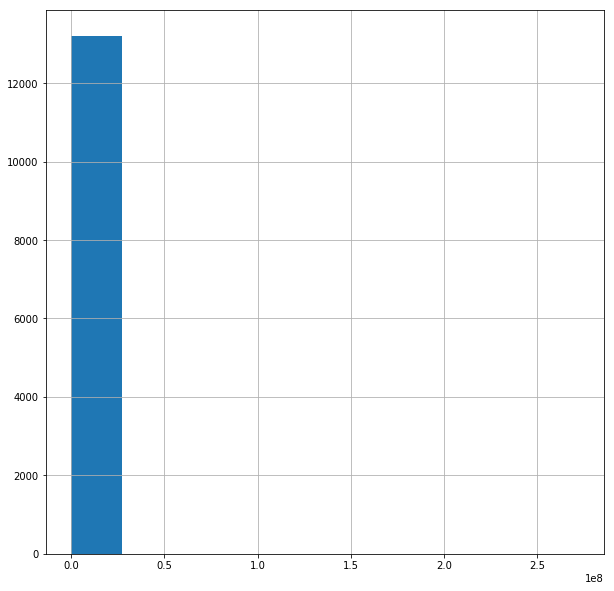

In [84]:
%matplotlib inline
permisos_SF.Estimated_Cost.hist(figsize=(10,10))

Hmmm. hay algo que pareciera que está fuera de lugar (un outlayer) ... o es algún proyecto super exclusivo y carisimo o es un valor inválido ...

Revisemos un poco mas...

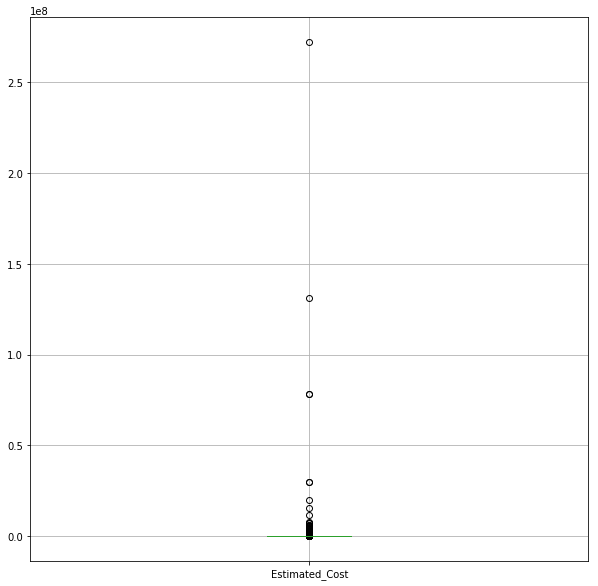

In [85]:
permisos_SF.boxplot(column='Estimated_Cost', figsize=(10,10))

Analizamos los outliers del Costo Estimado.

In [86]:
outliers = permisos_SF[permisos_SF.Estimated_Cost > (permisos_SF.Estimated_Cost.mean() + 3 * permisos_SF.Estimated_Cost.std())]
outliers

,Permit_Type,Permit_Type_Definition,Permit_Creation_Date,Block,Lot,Street_Number,Street_Name,Street_Suffix,Description,Current_Status,Current_Status_Date,Filed_Date,Issued_Date,First_Construction_Document_Date,Number_of_Existing_Stories,Number_of_Proposed_Stories,Permit_Expiration_Date,Estimated_Cost,Revised_Cost,Existing_Use,Existing_Units,Proposed_Use,Proposed_Units,Plansets,Existing_Construction_Type,Existing_Construction_Type_Description,Proposed_Construction_Type,Proposed_Construction_Type_Description,Supervisor_District,Neighborhoods_-_Analysis_Boundaries,Zipcode,Location,Record_ID,name_weirdness
Permit Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
201301319232,1,new construction,2013-01-31,3509,043,104,09th,St,"to erect 160 units, 11 stories with basement m...",complete,2016-09-13,2013-01-31,2013-08-29,2013-11-04,0.00,11.00,2019-07-29,20000000.00,29011002.00,None,0.00,apartments,160.00,2.00,0.00,None,1.00,constr type 1,6.00,South of Market,94103.00,"(37.775874401978164, -122.41474608209646)",1294896156329.00,0
201303132080,1,new construction,2013-03-13,3720,009,101,01st,St,"to erect 63 stories with 3 basements, office, ...",issued,2013-09-27,2013-03-13,2013-09-27,2014-02-19,0.00,63.00,2019-08-27,272000000.00,336200000.00,None,0.00,office,0.00,2.00,0.00,None,1.00,constr type 1,6.00,Financial District/South Beach,94105.00,"(37.78985529072401, -122.39680054826306)",1298608489715.00,0
201303222886,1,new construction,2013-03-22,0785,029,380,Fulton,St,"erect 4 story, no basement, club house/gym/poo...",complete,2015-03-23,2013-03-22,2013-08-27,2013-12-04,0.00,4.00,2019-07-27,11500000.00,11500000.00,None,0.00,recreation bldg,0.00,2.00,0.00,None,2.00,constr type 2,5.00,Hayes Valley,94102.00,"(37.779074435016895, -122.42288007095966)",1299648489549.00,0
201304023626,1,new construction,2013-04-02,3738,004,280,Beale,St,"to erect 32 stories, 479 condo units with retail.",complete,2017-02-09,2013-04-02,2013-08-28,2014-02-20,0.00,32.00,2019-07-28,131088316.00,131088316.00,None,0.00,apartments,479.00,2.00,0.00,None,1.00,constr type 1,6.00,Financial District/South Beach,94105.00,"(37.788731891648396, -122.39360475309186)",1300653291153.00,0
201304043755,1,new construction,2013-04-04,5281,003,901,Rankin,St,"to erect 2 stories, no basement, commercial wa...",complete,2015-01-26,2013-04-04,2013-08-21,2013-10-08,0.00,2.00,2019-07-21,15500000.00,15500000.00,None,0.00,"warehouse,no frnitur",0.00,2.00,0.00,None,3.00,constr type 3,10.00,Bayview Hunters Point,94124.00,"(37.74139803774405, -122.39496784660912)",1300716376649.00,0
201305015894,1,new construction,2013-05-01,3719,011,181,Fremont,St,"to erect 54 stories, 5 basement, 74 residentia...",issued,2013-12-26,2013-05-01,2013-12-26,2014-01-24,0.00,54.00,2019-11-25,78462315.00,136313594.00,None,0.00,apartments,74.00,2.00,0.00,None,1.00,constr type 1,6.00,Financial District/South Beach,94105.00,"(37.78980056380927, -122.39532706257731)",1303440358581.00,0
201305015894,1,new construction,2013-05-01,3719,010,183,Fremont,St,"to erect 54 stories, 5 basement, 74 residentia...",issued,2013-12-26,2013-05-01,2013-12-26,2014-01-24,0.00,54.00,2019-11-25,78462315.00,136313594.00,None,0.00,apartments,74.00,2.00,0.00,None,1.00,constr type 1,6.00,Financial District/South Beach,94105.00,"(37.789642439733605, -122.39522078848411)",1303441164656.00,0
201305036062,1,new construction,2013-05-03,0794,028,555,Fulton,St,"to erect 5 stories of 139 dwelling units, reta...",issued,2014-03-26,2013-05-03,2014-03-26,2014-07-28,0.00,5.00,2020-02-23,30000000.00,48723500.00,None,0.00,apartments,139.00,6.00,0.00,None,1.00,constr type 1,5.00,Hayes Valley,94102.00,"(37.77816825589716, -122.42568990589726)",130366381787.00,0
201305036062,1,new construction,2013-05-03,0794,015,746,Laguna,St,"to erect 5 stories of 139 dwelling units, reta...",issued,2014-03-26,2013-05-03,2014-03-26,2014-07-28,0.00,5.00,2020-02-23,30000000.00,48723500.00,None,0.00,apartments,139.00,6.00,0.00,None,1.00,constr type 1,5.00,Hayes Valley,94102.00,"(37.77809

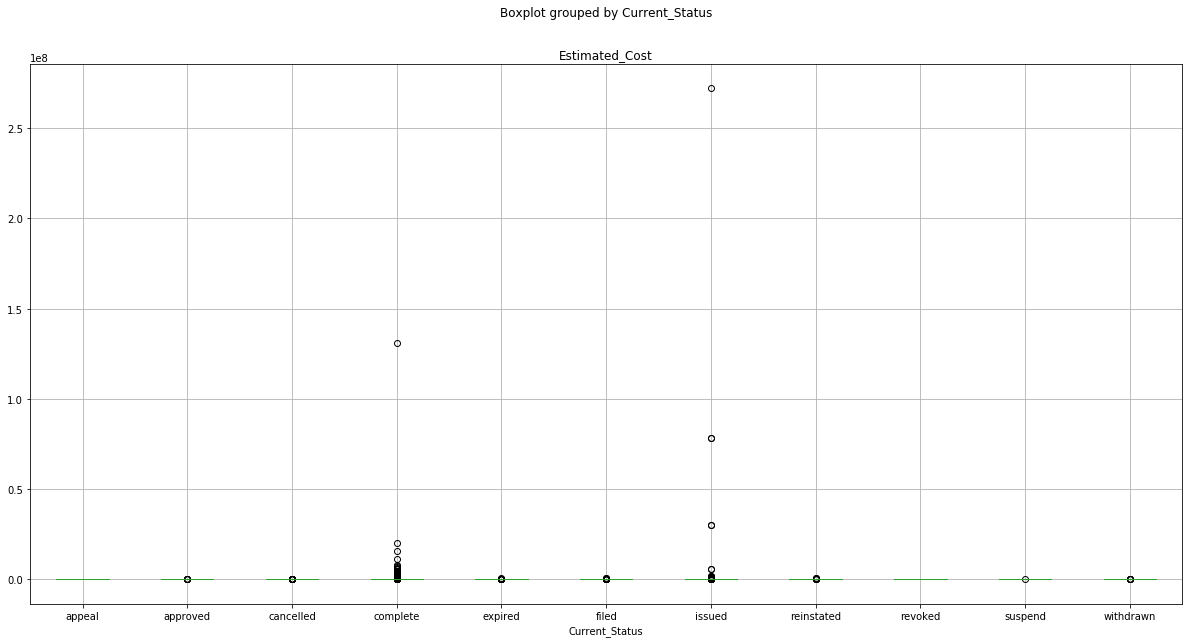

In [87]:
permisos_SF.boxplot(column='Estimated_Cost',by='Current_Status', figsize=(20,10))

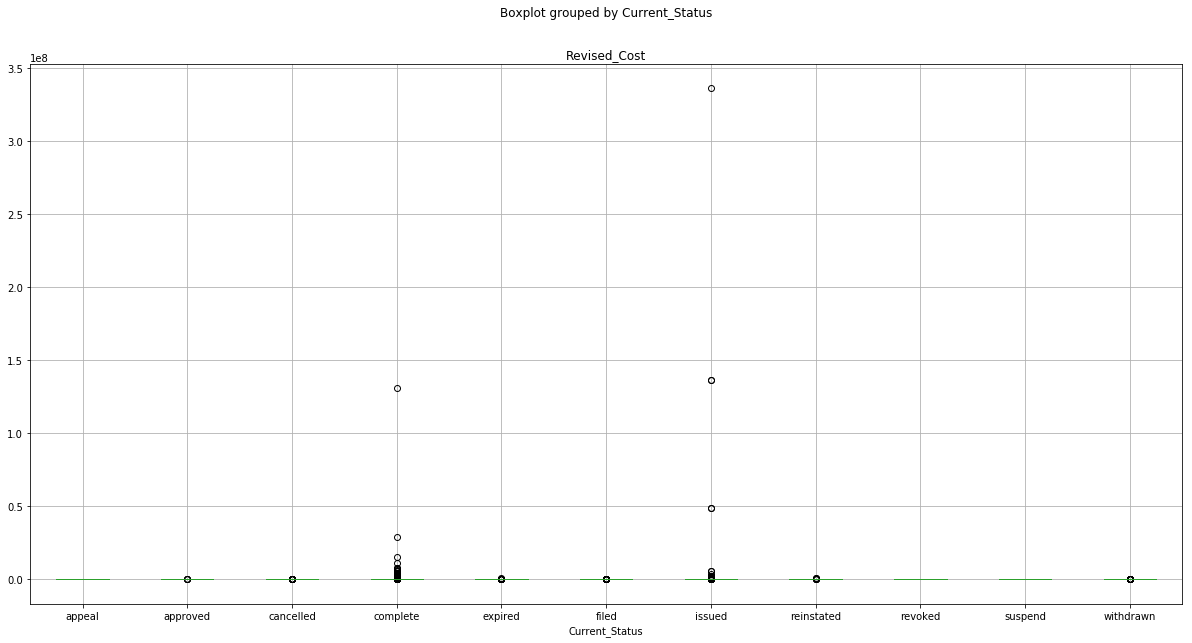

In [88]:
permisos_SF.boxplot(column='Revised_Cost',by='Current_Status', figsize=(20,10))

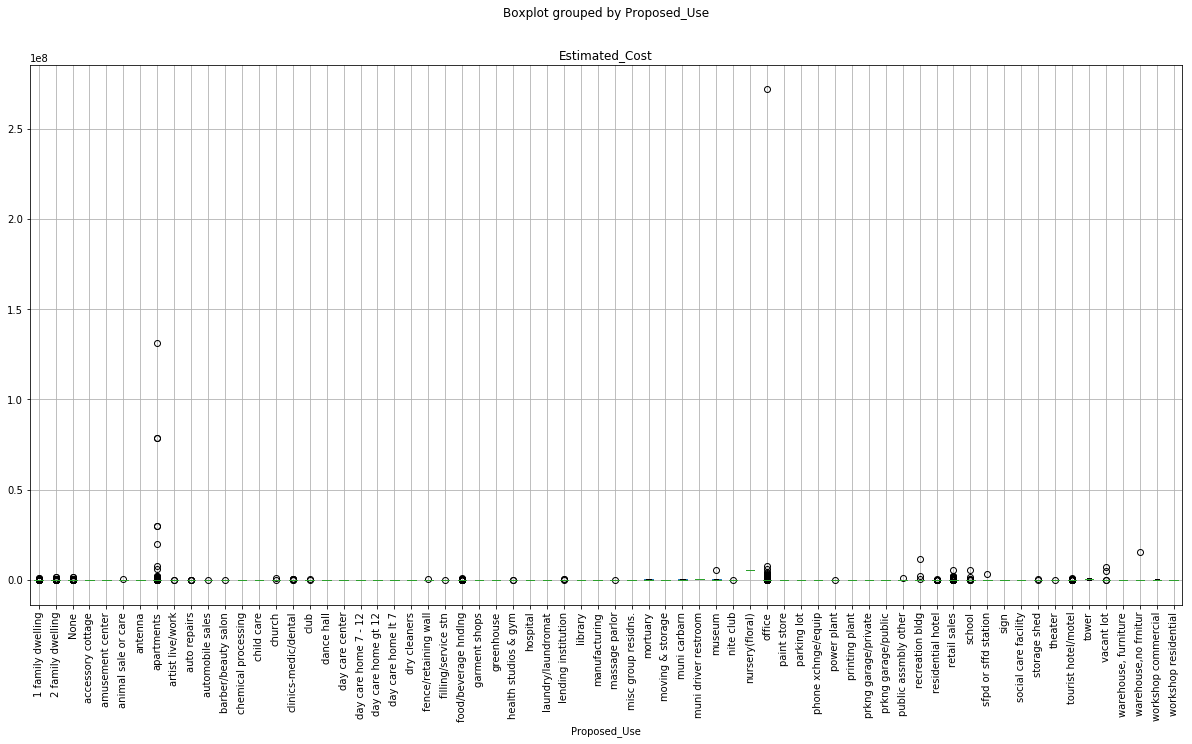

In [89]:
permisos_SF.boxplot(column='Estimated_Cost',by='Proposed_Use', figsize=(20,10), rot=90)

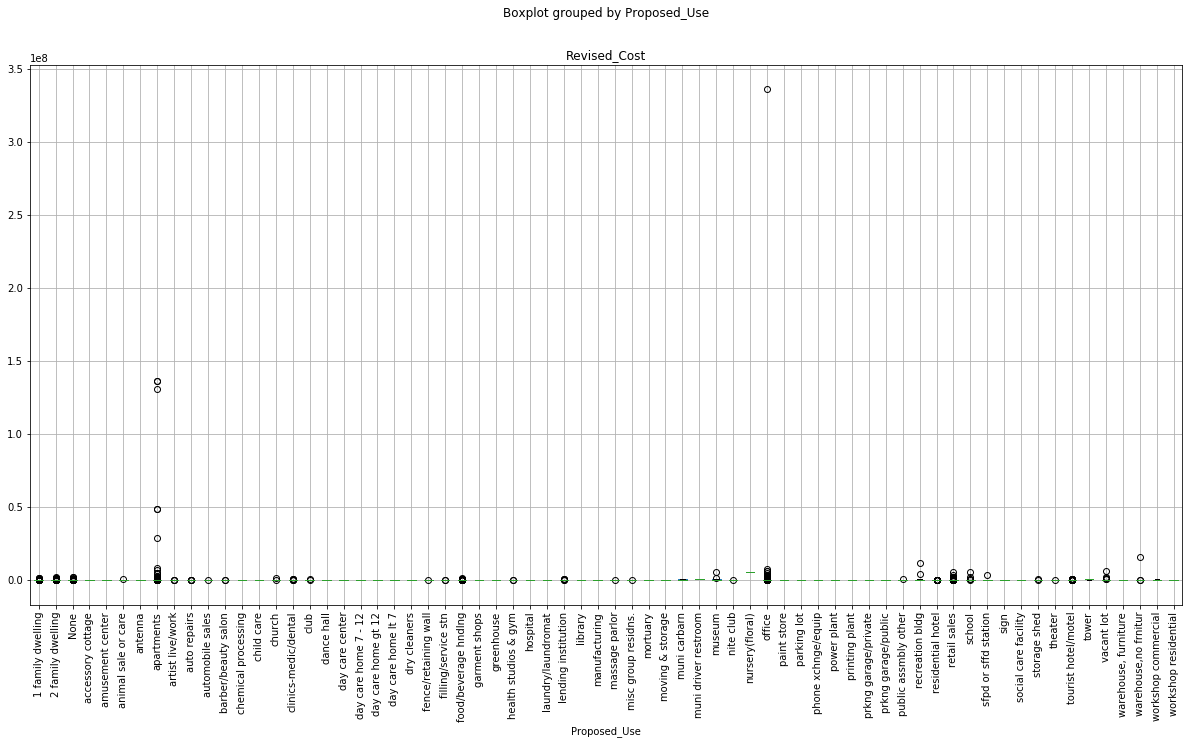

In [90]:
permisos_SF.boxplot(column='Revised_Cost',by='Proposed_Use', figsize=(20,10), rot=90)

Será una torre de oficinas de lujo en algún barrio exclusivo? .... tengamos registrado y en mente este outlayer, por las dudas nos distorsione futuros análisis...



## 2.7. Evaluar cómo comprimir los datos 

Valdrá la pena? en la actualidad, en las nubes el almacenamiento no suele ser problema, pero sí lo es la velocidad para leerlo que suele ser mandatoria a la hora de determinar el formato de almacenamiento. En general, el formato csv es el mas usado, ya que, a pesar de no ser un standard reconocido, es un standard "de facto" para transferir archivos.

## 2.8. Guardar el set de datos con un nombre informativo

El nombre del dataset a guardar es __Building_Permits_final_1.csv__ ...
¡¡¡¡¡NO DEBEMOS MODIFICAR EL DATASOURCE ORIGINAL!!!!!!

In [91]:
permisos_SF.to_csv("../input/Building_Permits_final_1.csv")